+-------+--------------------+--------------------+
| Epoch |        dice        |        Hd95        |
+-------+--------------------+--------------------+
|   0   | 0.7158245305374772 | 17.662766246419196 |
|   1   | 0.7829349979438381 | 27.501498468298653 |
|   2   | 0.7051936410867676 | 13.059373241558404 |
|   3   | 0.7796163982123689 | 19.553470043550455 |
|   4   | 0.7944874650199294 | 16.89256458909887  |
|   5   | 0.8117931333579189 | 26.177789849147462 |
|   6   | 0.8011026387292446 | 13.416162080513802 |
|   7   | 0.8041190398719672 | 15.228715807931458 |
|   8   | 0.8133741384405638 | 19.56050358947955  |
|   9   | 0.8156644591467559 | 18.874899852066704 |
+-------+--------------------+--------------------+
+-------+--------------------+--------------------+
| Epoch |        dice        |        Hd95        |
+-------+--------------------+--------------------+
|   0   | 0.8267387748734399 | 11.15360322416874  |
|   1   | 0.8467602855907422 | 11.789187525657189 |
|   2   | 0.

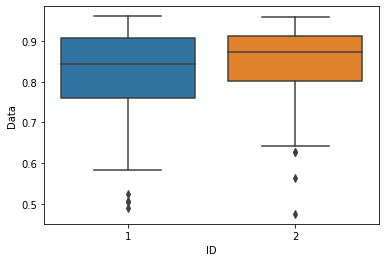

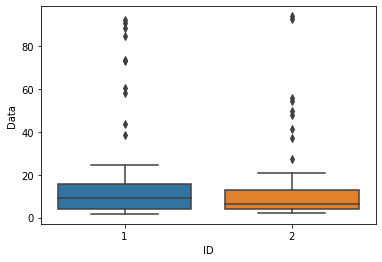

In [34]:
import numpy as np
import os 
import csv
import matplotlib.pyplot as plt
import seaborn as sns

dice = []
hd95 = []

from os import listdir
from os.path import isfile, join

epoch_num = 10
# dice_output = []
# hd95_output = []

dice_box = []
hd95_box = []
in_type = ["RI","PTE"]
for val in in_type:
    dice_output = []
    hd95_output = []
    for epoch in range(epoch_num):
        dice = []
        hd95 = []
        folder_list = []
    #     print(epoch)
        folder_list = [f for f in listdir(os.getcwd() + 
                                          "/Test_outputs/Brats_"+val+"_D10_C100_E10_0/Epoch_"+str(epoch)+"/Metrics/") if isfile(join(os.getcwd() + 
                                          "/Test_outputs/Brats_"+val+"_D10_C100_E10_0/Epoch_"+str(epoch)+"/Metrics/", f))]

        # print(folder_list)
        #folder_list = [os.getcwd() + "/Test_outputs/Brats_PTE_D10_C100_E10_0/Epoch_0/Metrics/013_28_1_whimg_norm_154_Metrics.csv"]
        for folder in range(len(folder_list)):
        #     print(folder)
            with open(os.getcwd() + "/Test_outputs/Brats_"+val+"_D10_C100_E10_0/Epoch_"+str(epoch)+"/Metrics/" + folder_list[folder]) as f:
                reader = csv.DictReader(f)
                for row in reader:
    #                 if folder == 0:
    #                     print(row.keys())
    #                     print("")
                    dice.append(row["dice"])
                    hd95.append(row["hd95"])

        dice = [eval(i) for i in dice]
        hd95 = [eval(i) for i in hd95]

        dice_output.append(np.mean(dice))
        hd95_output.append(np.mean(hd95))
    #     print("Dice", np.mean(dice))
    # #     print("")
    #     print("HD95", np.mean(hd95))

    from prettytable import PrettyTable
    t = PrettyTable(['Epoch','dice', 'Hd95'])
    for a in range(len(hd95_output)):
        t.add_row([a, dice_output[a], hd95_output[a]])
    print(t)
    dice_box.append(dice)
    hd95_box.append(hd95)
# print(dice_box)

df = pd.DataFrame(dice_box).T
df = df.rename(columns={k: f'Data{k+1}' for k in range(len(dice_box))}).reset_index()
df = pd.wide_to_long(df, stubnames = ['Data'], i = 'index', j = 'ID').reset_index()[['ID', 'Data']]
sns.boxplot(x='ID', y = 'Data', data = df)
plt.show()
df = 0
df = pd.DataFrame(hd95_box).T
df = df.rename(columns={k: f'Data{k+1}' for k in range(len(hd95_box))}).reset_index()
df = pd.wide_to_long(df, stubnames = ['Data'], i = 'index', j = 'ID').reset_index()[['ID', 'Data']]
sns.boxplot(x='ID', y = 'Data', data = df)
plt.show()
        

In [ ]:
from matplotlib.ticker import MultipleLocator
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv  

sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})
for value in ["10","100"]:
    epoch = 0
    show_ones = False
    for train_stage in ["Testing"]:
        percentage_array = [0,1,2,3,4,5,6,7,8,9]
        inputs,inputs2 = ["","","","","","","","","",""],["","","","","","","","","",""]
        pred_type = ["predictions_sigmoid","predictions"]

        for percentage in range(len(percentage_array)):
            inputs[percentage] = "/Test_outputs/Brats_"+val+"_D10_C100_E10_0/Epoch_"+str(epoch)+"/Metrics/" + folder_list[folder]
            inputs2[percentage] = "Test_outputs/Brats_PTE_D"+value+"_C100_E10_0/Epoch_" + str(percentage_array[percentage]) + "/" +  "_Dice_predictions.csv"

        title_output_model = ["RI", "PTE"]#, "PTE"]
        col_name = ["Epoch 1","Epoch 2","Epoch 3","Epoch 4","Epoch 5","Epoch 6","Epoch 7","Epoch 8","Epoch 9"]
        
        with open(os.getcwd() + "/Test_outputs/Brats_"+val+"_D10_C100_E10_0/Epoch_"+str(epoch)+"/Metrics/" + folder_list[folder]) as f:
            reader = csv.DictReader(f)
        
        train_data_input = pd.DataFrame(data=None, columns=title_output_model)# .astype(int)

        x_array = np.array([])
        y_array = np.array([])
        z_array = np.array([])
        a_array = np.array([])

        index = [0,1,2,3,4,5,6,7,8]#,9]#,5]
        input_test = [inputs, inputs2]#, inputs3]

        for i in range(len(index)):
            x_array = np.array([])
            y_array = np.array([])
            z_array = np.array([])

            x_array = np.genfromtxt(input_test[0][index[i]], delimiter=',',invalid_raise = False)
            x_array = np.ndarray.flatten(x_array)
            if show_ones == True:
                x_array[x_array == 1] = np.nan

            y_array = np.genfromtxt(input_test[1][index[i]], delimiter=',',invalid_raise = False)
            y_array = np.ndarray.flatten(y_array)
            if show_ones == True:
                y_array[y_array == 1] = np.nan

            df1 = pd.DataFrame(data = {"Division":np.full(len(x_array), col_name[index[i]]),
                                       "RI":x_array,"PTE":y_array})#,"PTE":z_array})
            train_data_input = train_data_input.append(df1,ignore_index=True)

        data = train_data_input.melt('Division', var_name='Model Pre-training level', value_name='Mean Dice')
        fig = plt.figure(figsize=(10,5))
        plt.grid()
        ax=sns.boxplot(y='Mean Dice', x='Division', hue='Model Pre-training level', data=data)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
        plt.title("Mean "+train_stage+" Dice score with pretraining. Grouped by epoch \nfor "+value+"% dataset used for training."
                 ,fontsize=20)
        plt.ylim(-0.05,1.05)
        ax.xaxis.set_minor_locator(MultipleLocator(0.5))
        ax.xaxis.grid(True, which='minor', color='black', lw=1)
        plt.xlabel("",fontsize=18)
        plt.ylabel("Mean Volume Dice Score",fontsize=18)
        plt.show()

In [ ]:
["Brats_10_c_100_randomInit_10_epochs", "Brats_100_c_100_pretrained_10_epochs"]



+-------+--------------------+--------------------+
| Epoch |      RI dice       |      PTE dice      |
+-------+--------------------+--------------------+
|   0   | 0.7158245305374772 | 0.8267387748734399 |
|   1   | 0.7829349979438381 | 0.8467602855907422 |
|   2   | 0.7051936410867676 | 0.8213036496589172 |
|   3   | 0.7796163982123689 | 0.8384125603343704 |
|   4   | 0.7944874650199294 | 0.8325614035866554 |
|   5   | 0.8117931333579189 | 0.8368170800686368 |
|   6   | 0.8011026387292446 | 0.8457583886370084 |
|   7   | 0.8041190398719672 | 0.8445293405384181 |
|   8   | 0.8133741384405638 | 0.8510366865445217 |
|   9   | 0.8156644591467559 | 0.8426119936102403 |
+-------+--------------------+--------------------+


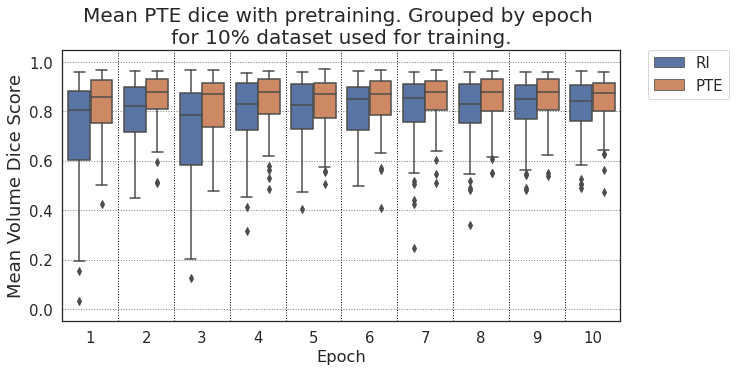

+-------+--------------------+--------------------+
| Epoch |      RI hd95       |      PTE hd95      |
+-------+--------------------+--------------------+
|   0   | 17.662766246419196 | 11.15360322416874  |
|   1   | 27.501498468298653 | 11.789187525657189 |
|   2   | 13.059373241558404 |  9.35582279573407  |
|   3   | 19.553470043550455 | 9.312955375303302  |
|   4   | 16.89256458909887  | 11.226861787260615 |
|   5   | 26.177789849147462 | 16.850105071486084 |
|   6   | 13.416162080513802 | 17.03499424792172  |
|   7   | 15.228715807931458 | 11.02981874859123  |
|   8   | 19.56050358947955  | 11.713587186629308 |
|   9   | 18.874899852066704 | 14.357995837613151 |
+-------+--------------------+--------------------+


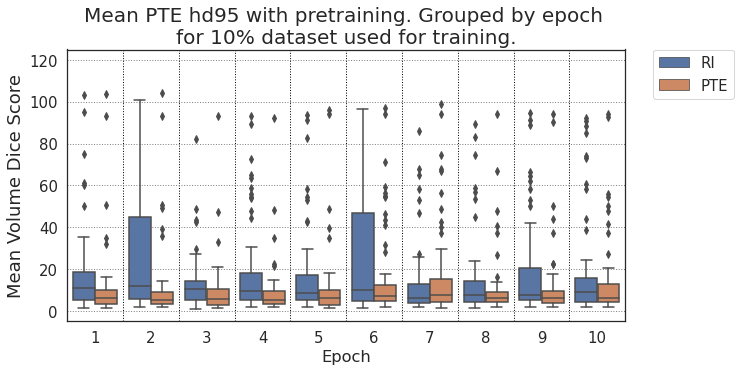

+-------+--------------------+--------------------+
| Epoch |    RI precision    |   PTE precision    |
+-------+--------------------+--------------------+
|   0   | 0.9458341059708274 | 0.933803641219312  |
|   1   | 0.8815215895087485 | 0.9066639533149073 |
|   2   | 0.9696812883458348 | 0.9432727097309909 |
|   3   | 0.9054321002991701 | 0.9135481724890311 |
|   4   | 0.9159324019257381 | 0.9333055304997958 |
|   5   | 0.8796299740530928 | 0.8969804024613556 |
|   6   | 0.9350269532337155 | 0.8937445246578247 |
|   7   | 0.9272292656484244 | 0.9055766716263864 |
|   8   | 0.9073786805727933 | 0.9059864544692592 |
|   9   | 0.9123228342403471 | 0.8962364056505913 |
+-------+--------------------+--------------------+


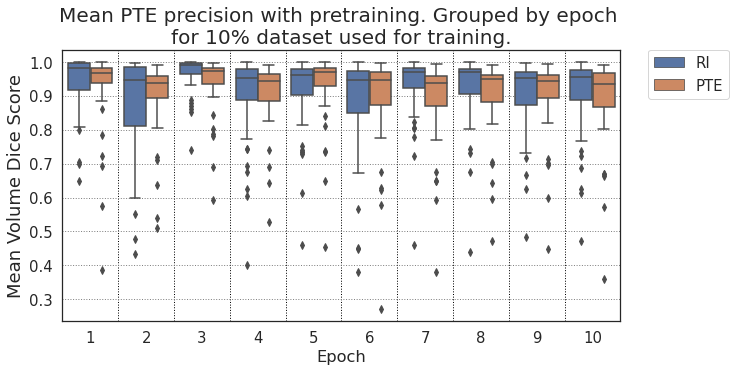

+-------+--------------------+--------------------+
| Epoch |     RI recall      |     PTE recall     |
+-------+--------------------+--------------------+
|   0   | 0.6327549430563036 | 0.7637926577472539 |
|   1   | 0.753077332038935  | 0.8140232948817555 |
|   2   | 0.6036717394944843 | 0.7514438340204286 |
|   3   | 0.7313925294200739 | 0.7982465330338651 |
|   4   | 0.740471557786536  | 0.775486695204299  |
|   5   | 0.7914740410788239 | 0.8110278932976034 |
|   6   | 0.7362094837750331 | 0.8265940922962208 |
|   7   | 0.7435619243595465 | 0.8132218183587212 |
|   8   | 0.7710335432668206 | 0.8227708932463553 |
|   9   |  0.77102889848881  | 0.8176313918097033 |
+-------+--------------------+--------------------+


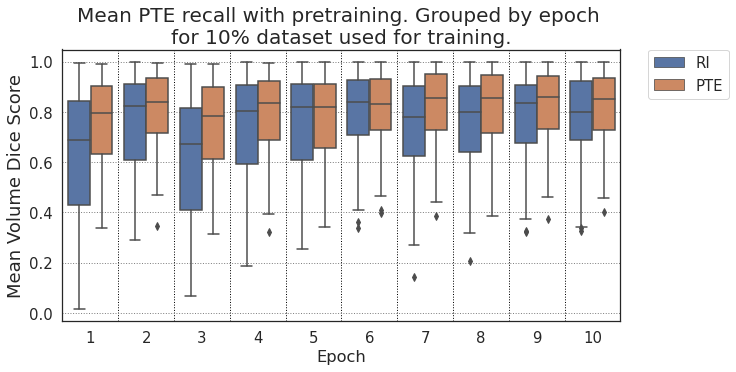


Epoch 3
+-----------+--------------------+--------------------+
|   Metric  |         RI         |        PTE         |
+-----------+--------------------+--------------------+
|    dice   | 0.7796163982123689 | 0.8384125603343704 |
|    hd95   | 19.553470043550455 | 9.312955375303302  |
| precision | 0.9054321002991701 | 0.9135481724890311 |
|   recall  | 0.7313925294200739 | 0.7982465330338651 |
+-----------+--------------------+--------------------+

####################################################################################################
####################################################################################################
####################################################################################################
+-------+--------------------+--------------------+
| Epoch |      RI dice       |      PTE dice      |
+-------+--------------------+--------------------+
|   0   | 0.8653681604274593 | 0.8793236367550967 |
|   1   | 0.8704436740947268 | 

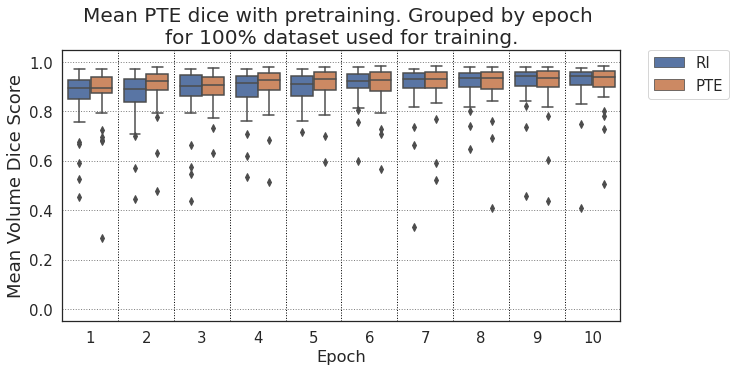

+-------+--------------------+--------------------+
| Epoch |      RI hd95       |      PTE hd95      |
+-------+--------------------+--------------------+
|   0   | 17.791272706734496 | 6.449880609177707  |
|   1   | 15.591745752200733 | 7.1938821022970565 |
|   2   | 5.156119076829206  | 5.695165159409506  |
|   3   | 5.451310657618339  | 6.078021676498543  |
|   4   | 5.003900438024283  | 5.794003708320751  |
|   5   | 6.133878954251606  | 4.344289817308125  |
|   6   | 4.848864503074105  | 6.366815922971357  |
|   7   | 4.078387806290074  | 4.813774417157758  |
|   8   | 4.0312998365937505 | 5.9310224110620045 |
|   9   | 3.4692955880834138 | 5.623851075925325  |
+-------+--------------------+--------------------+


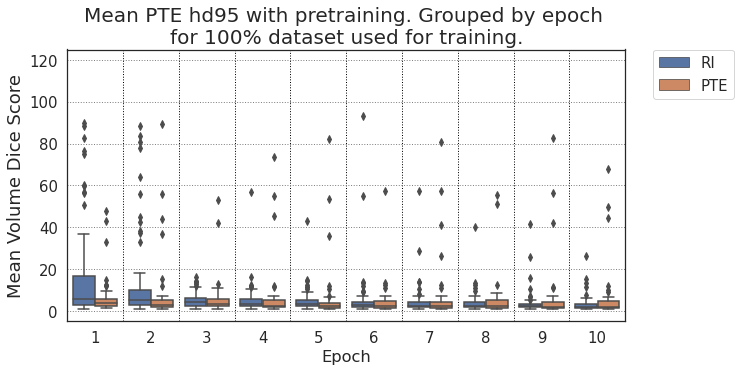

+-------+--------------------+--------------------+
| Epoch |    RI precision    |   PTE precision    |
+-------+--------------------+--------------------+
|   0   | 0.8964944876569749 | 0.939596112304417  |
|   1   | 0.915213710435776  | 0.9342885632933359 |
|   2   | 0.9609995695285416 | 0.9626764435234966 |
|   3   | 0.9660723386315135 | 0.9460328110441353 |
|   4   | 0.9640979527957786 | 0.9423510287769372 |
|   5   | 0.9485410847548937 | 0.9600796957638011 |
|   6   | 0.9448551706552513 | 0.9425567346039131 |
|   7   | 0.953180867008542  | 0.9543748711848871 |
|   8   | 0.9343217775666012 | 0.9414430868184237 |
|   9   | 0.9406144528926589 | 0.9489871486422542 |
+-------+--------------------+--------------------+


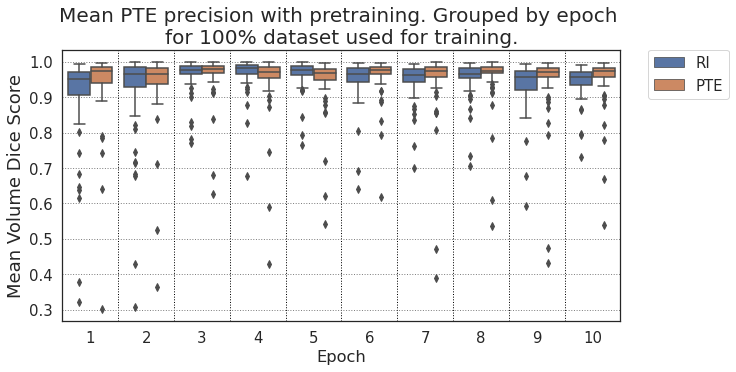

+-------+--------------------+--------------------+
| Epoch |     RI recall      |     PTE recall     |
+-------+--------------------+--------------------+
|   0   | 0.8536538389722536 | 0.8340195163103556 |
|   1   | 0.8470284557640848 | 0.8805311363216114 |
|   2   | 0.8273620990780465 | 0.8323201673399445 |
|   3   | 0.8343943940839628 | 0.8798438646775213 |
|   4   | 0.8431438053902176 |  0.89165831908809  |
|   5   | 0.8828328984827288 | 0.8667214850912719 |
|   6   | 0.878492293866482  | 0.8891553564752944 |
|   7   | 0.8813050268462896 | 0.8751963554465775 |
|   8   | 0.9074992295770083 | 0.8920911792324648 |
|   9   | 0.9074188561852465 | 0.8907377798654682 |
+-------+--------------------+--------------------+


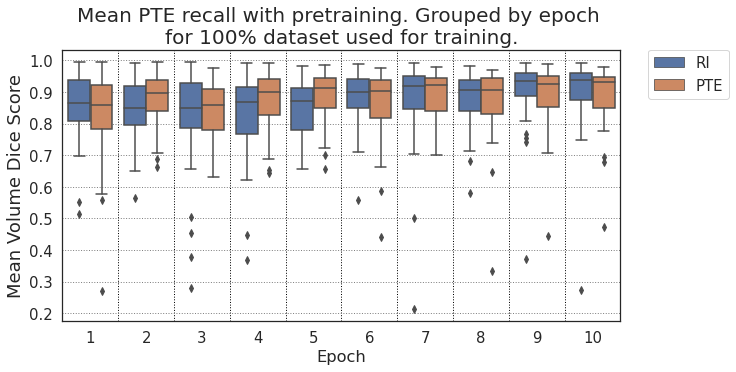


Epoch 3
+-----------+--------------------+--------------------+
|   Metric  |         RI         |        PTE         |
+-----------+--------------------+--------------------+
|    dice   | 0.8893621495798986 | 0.9082729546697634 |
|    hd95   | 5.451310657618339  | 6.078021676498543  |
| precision | 0.9660723386315135 | 0.9460328110441353 |
|   recall  | 0.8343943940839628 | 0.8798438646775213 |
+-----------+--------------------+--------------------+

####################################################################################################
####################################################################################################
####################################################################################################


In [8]:
import numpy as np
import os 
import csv
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import MultipleLocator
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv  

from prettytable import PrettyTable

metric_out = []
hd95 = []

from os import listdir
from os.path import isfile, join

epoch_num = 10
output_epoch = 3
folder_list = [[],[]]
in_type = ["RI","PTE"]
index = range(epoch_num)

# recall = sensitivity

col_name = ["1","2",
            "3","4",
            "5","6",
            "7","8",
            "9","10"]
    
for dataset_size in ["10", "100"]:
    metrics_table = PrettyTable(['Metric','RI', 'PTE'])
    for metric in ["dice","hd95","precision","recall"]:

        x_array = np.array([])
        y_array = np.array([])
        metric_output = []
        
        folder_len = len(listdir(os.getcwd() + "/Test_outputs/Brats_" + in_type[0] + "_D"+dataset_size+"_C100_E10_0/Epoch_"+str(0)+"/Metrics/"))
        
        out_x = np.empty([epoch_num, folder_len])
        out_y = np.empty([epoch_num, folder_len])

        train_data_input = pd.DataFrame(data=None, columns=in_type)

        for val in in_type:
            dice_output = []

            df1 = pd.DataFrame({"RI" : [], "PTE" : []})

            for epoch in range(epoch_num):
                metric_out = []

                x_array = np.array([])
                y_array = np.array([])
                
                folder_list = [f for f in listdir(os.getcwd() + 
                                          "/Test_outputs/Brats_"+val+"_D"+dataset_size+"_C100_E10_0/Epoch_"+str(epoch)+"/Metrics/") if isfile(join(os.getcwd() + 
                                          "/Test_outputs/Brats_"+val+"_D"+dataset_size+"_C100_E10_0/Epoch_"+str(epoch)+"/Metrics/", f))]
        
                for folder in range(len(folder_list)):

                    with open(os.getcwd() + "/Test_outputs/Brats_"+val+"_D"+dataset_size+"_C100_E10_0/Epoch_"+str(epoch)+"/Metrics/" + folder_list[folder]) as f:
                        reader = csv.DictReader(f)
                        for row in reader:
                            metric_out.append(row[metric])

                if val == "RI":
                    x_array = np.append(x_array, metric_out)
                    out_x[epoch] = x_array

                if val == "PTE":
                    y_array = np.append(y_array, metric_out)
                    out_y[epoch] = y_array

                x_array = x_array.astype(np.float)
                y_array = y_array.astype(np.float)

        for var in range(len(out_x)):
            df1 = pd.DataFrame(data = {"Epoch":np.full(len(out_x[var]), col_name[index[var]]),
                                           "RI":out_x[var],"PTE":out_y[var]})#,"PTE":z_array})

            train_data_input = train_data_input.append(df1,ignore_index=True)
            
            t = PrettyTable(['Epoch',"RI " + metric, "PTE " + metric])
            for a in range(10):
                t.add_row([a, np.mean(out_x[a]), np.mean(out_y[a])])
        metrics_table.add_row([metric, np.mean(out_x[output_epoch]), np.mean(out_y[output_epoch])])
        print(t)
        metric_out = []
        x_array = np.array([])
        y_array = np.array([])


        data = train_data_input.melt('Epoch', var_name='Model Pre-training level', value_name='Mean Dice')
        fig = plt.figure(figsize=(10,5))
        plt.grid()
        ax=sns.boxplot(y='Mean Dice', x='Epoch', hue='Model Pre-training level', data=data)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
        plt.title("Mean " + val + " " + metric + " with pretraining. Grouped by epoch \nfor "+dataset_size+"% dataset used for training."
                 ,fontsize=20)
        if metric == "dice":
            plt.ylim(-0.05,1.05)
        if metric == "hd95":
            plt.ylim(-5,125)
        ax.xaxis.set_minor_locator(MultipleLocator(0.5))
        ax.xaxis.grid(True, which='minor', color='black', lw=1)
        plt.ylabel("Mean Volume Dice Score",fontsize=18)
        plt.show()
    print("")
    print("Epoch " + str(output_epoch))
    print(metrics_table)
    print("")
    print("####################################################################################################")
    print("####################################################################################################")
    print("####################################################################################################")


+-------+--------------------+--------------------+
| Epoch |      RI dice       |      PTE dice      |
+-------+--------------------+--------------------+
|   0   | 0.7158245305374772 | 0.8267387748734399 |
|   1   | 0.7829349979438381 | 0.8467602855907422 |
|   2   | 0.7051936410867676 | 0.8213036496589172 |
|   3   | 0.7796163982123689 | 0.8384125603343704 |
|   4   | 0.7944874650199294 | 0.8325614035866554 |
|   5   | 0.8117931333579189 | 0.8368170800686368 |
|   6   | 0.8011026387292446 | 0.8457583886370084 |
|   7   | 0.8041190398719672 | 0.8445293405384181 |
|   8   | 0.8133741384405638 | 0.8510366865445217 |
|   9   | 0.8156644591467559 | 0.8426119936102403 |
+-------+--------------------+--------------------+


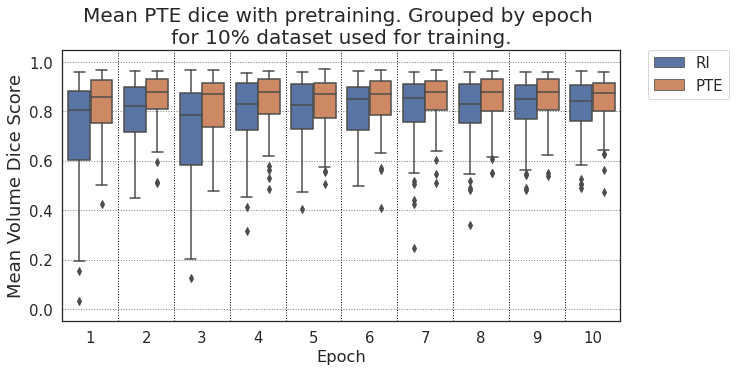

+-------+--------------------+--------------------+
| Epoch |      RI hd95       |      PTE hd95      |
+-------+--------------------+--------------------+
|   0   | 17.662766246419196 | 11.15360322416874  |
|   1   | 27.501498468298653 | 11.789187525657189 |
|   2   | 13.059373241558404 |  9.35582279573407  |
|   3   | 19.553470043550455 | 9.312955375303302  |
|   4   | 16.89256458909887  | 11.226861787260615 |
|   5   | 26.177789849147462 | 16.850105071486084 |
|   6   | 13.416162080513802 | 17.03499424792172  |
|   7   | 15.228715807931458 | 11.02981874859123  |
|   8   | 19.56050358947955  | 11.713587186629308 |
|   9   | 18.874899852066704 | 14.357995837613151 |
+-------+--------------------+--------------------+


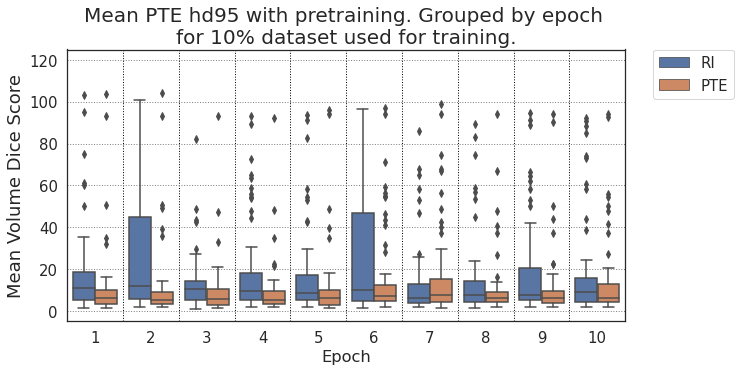

+-------+--------------------+--------------------+
| Epoch |    RI precision    |   PTE precision    |
+-------+--------------------+--------------------+
|   0   | 0.9458341059708274 | 0.933803641219312  |
|   1   | 0.8815215895087485 | 0.9066639533149073 |
|   2   | 0.9696812883458348 | 0.9432727097309909 |
|   3   | 0.9054321002991701 | 0.9135481724890311 |
|   4   | 0.9159324019257381 | 0.9333055304997958 |
|   5   | 0.8796299740530928 | 0.8969804024613556 |
|   6   | 0.9350269532337155 | 0.8937445246578247 |
|   7   | 0.9272292656484244 | 0.9055766716263864 |
|   8   | 0.9073786805727933 | 0.9059864544692592 |
|   9   | 0.9123228342403471 | 0.8962364056505913 |
+-------+--------------------+--------------------+


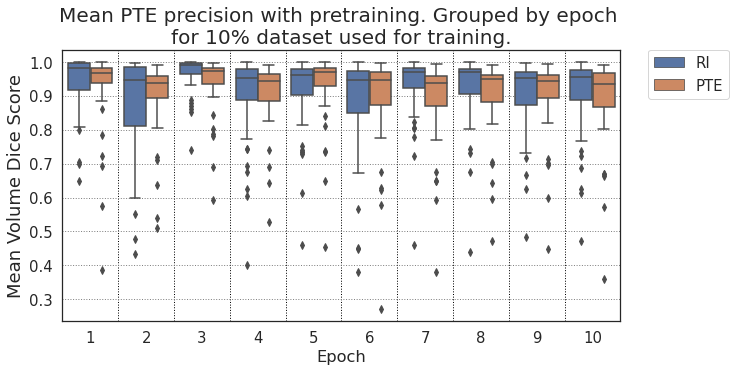

+-------+--------------------+--------------------+
| Epoch |     RI recall      |     PTE recall     |
+-------+--------------------+--------------------+
|   0   | 0.6327549430563036 | 0.7637926577472539 |
|   1   | 0.753077332038935  | 0.8140232948817555 |
|   2   | 0.6036717394944843 | 0.7514438340204286 |
|   3   | 0.7313925294200739 | 0.7982465330338651 |
|   4   | 0.740471557786536  | 0.775486695204299  |
|   5   | 0.7914740410788239 | 0.8110278932976034 |
|   6   | 0.7362094837750331 | 0.8265940922962208 |
|   7   | 0.7435619243595465 | 0.8132218183587212 |
|   8   | 0.7710335432668206 | 0.8227708932463553 |
|   9   |  0.77102889848881  | 0.8176313918097033 |
+-------+--------------------+--------------------+


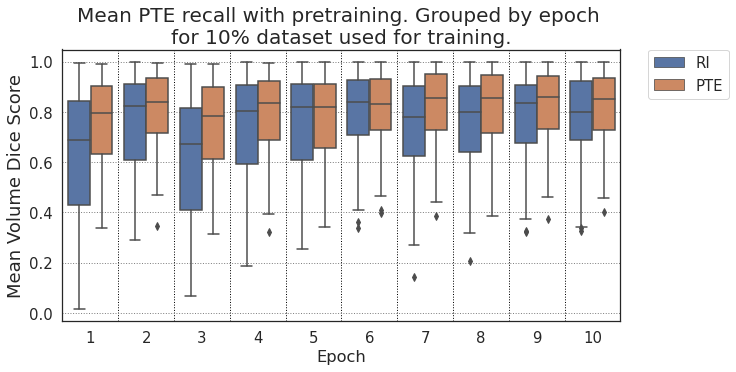

+-------+--------------------+--------------------+
| Epoch |   RI specificity   |  PTE specificity   |
+-------+--------------------+--------------------+
|   0   | 0.9996731246771605 | 0.9995070723087889 |
|   1   | 0.9990452107790216 | 0.9991740115066898 |
|   2   | 0.9998106100805273 |  0.99958275543499  |
|   3   | 0.9991579596055796 | 0.999234760322121  |
|   4   | 0.9992964012781816 | 0.9995127208094129 |
|   5   | 0.9989551992483052 | 0.9991554913002028 |
|   6   | 0.9994695762482523 | 0.9991017171957899 |
|   7   | 0.9994199064012658 | 0.9992109500885088 |
|   8   | 0.9991660448690488 | 0.9991963658113665 |
|   9   | 0.9992538995334752 | 0.9990944801516428 |
+-------+--------------------+--------------------+


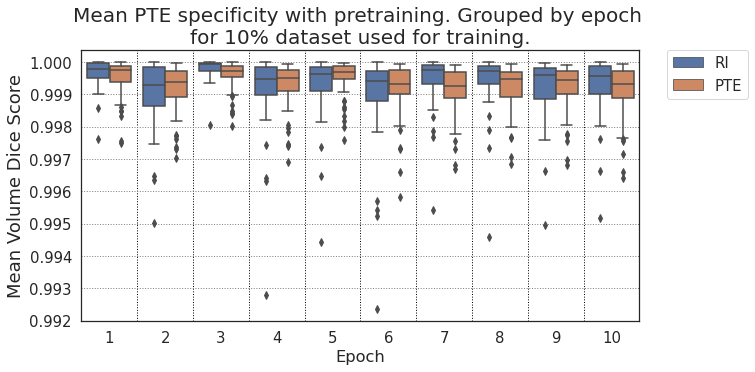


Epoch 4
+-------------+--------------------+--------------------+
|    Metric   |         RI         |        PTE         |
+-------------+--------------------+--------------------+
|     dice    | 0.7944874650199294 | 0.8325614035866554 |
|     hd95    | 16.89256458909887  | 11.226861787260615 |
|  precision  | 0.9159324019257381 | 0.9333055304997958 |
|    recall   | 0.740471557786536  | 0.775486695204299  |
| specificity | 0.9992964012781816 | 0.9995127208094129 |
+-------------+--------------------+--------------------+

####################################################################################################
####################################################################################################
####################################################################################################
+-------+--------------------+--------------------+
| Epoch |      RI dice       |      PTE dice      |
+-------+--------------------+--------------------+
|   0   |

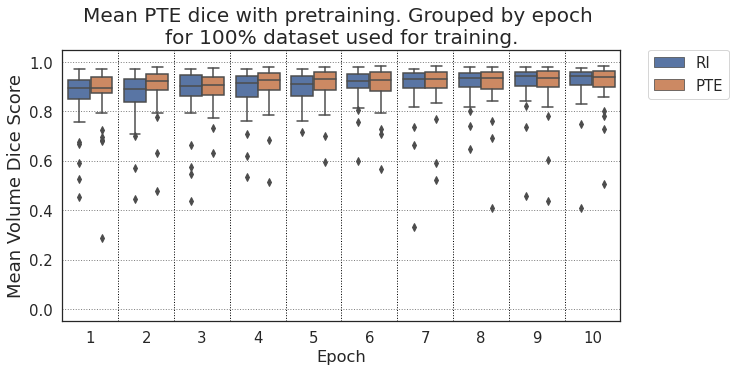

+-------+--------------------+--------------------+
| Epoch |      RI hd95       |      PTE hd95      |
+-------+--------------------+--------------------+
|   0   | 17.791272706734496 | 6.449880609177707  |
|   1   | 15.591745752200733 | 7.1938821022970565 |
|   2   | 5.156119076829206  | 5.695165159409506  |
|   3   | 5.451310657618339  | 6.078021676498543  |
|   4   | 5.003900438024283  | 5.794003708320751  |
|   5   | 6.133878954251606  | 4.344289817308125  |
|   6   | 4.848864503074105  | 6.366815922971357  |
|   7   | 4.078387806290074  | 4.813774417157758  |
|   8   | 4.0312998365937505 | 5.9310224110620045 |
|   9   | 3.4692955880834138 | 5.623851075925325  |
+-------+--------------------+--------------------+


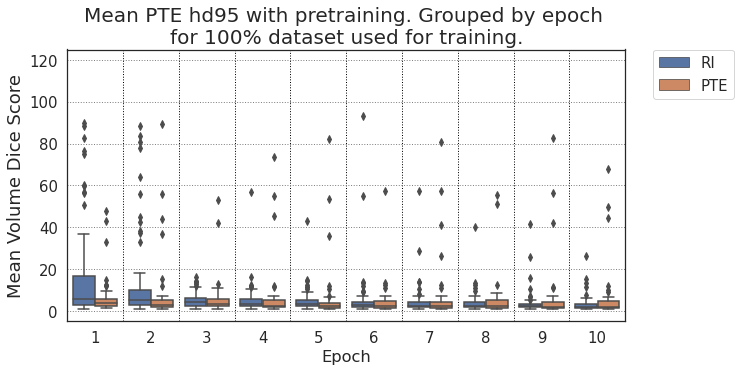

+-------+--------------------+--------------------+
| Epoch |    RI precision    |   PTE precision    |
+-------+--------------------+--------------------+
|   0   | 0.8964944876569749 | 0.939596112304417  |
|   1   | 0.915213710435776  | 0.9342885632933359 |
|   2   | 0.9609995695285416 | 0.9626764435234966 |
|   3   | 0.9660723386315135 | 0.9460328110441353 |
|   4   | 0.9640979527957786 | 0.9423510287769372 |
|   5   | 0.9485410847548937 | 0.9600796957638011 |
|   6   | 0.9448551706552513 | 0.9425567346039131 |
|   7   | 0.953180867008542  | 0.9543748711848871 |
|   8   | 0.9343217775666012 | 0.9414430868184237 |
|   9   | 0.9406144528926589 | 0.9489871486422542 |
+-------+--------------------+--------------------+


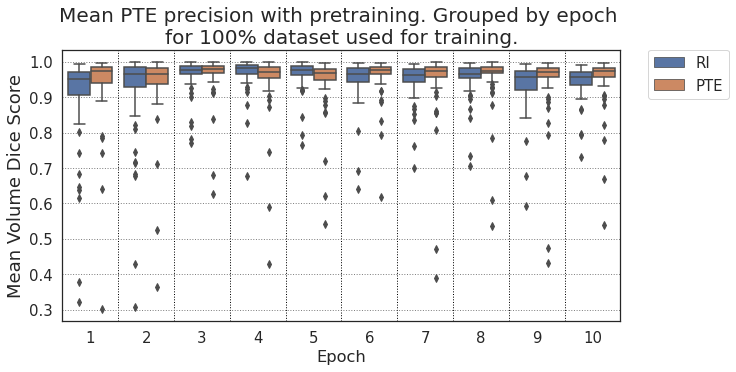

+-------+--------------------+--------------------+
| Epoch |     RI recall      |     PTE recall     |
+-------+--------------------+--------------------+
|   0   | 0.8536538389722536 | 0.8340195163103556 |
|   1   | 0.8470284557640848 | 0.8805311363216114 |
|   2   | 0.8273620990780465 | 0.8323201673399445 |
|   3   | 0.8343943940839628 | 0.8798438646775213 |
|   4   | 0.8431438053902176 |  0.89165831908809  |
|   5   | 0.8828328984827288 | 0.8667214850912719 |
|   6   | 0.878492293866482  | 0.8891553564752944 |
|   7   | 0.8813050268462896 | 0.8751963554465775 |
|   8   | 0.9074992295770083 | 0.8920911792324648 |
|   9   | 0.9074188561852465 | 0.8907377798654682 |
+-------+--------------------+--------------------+


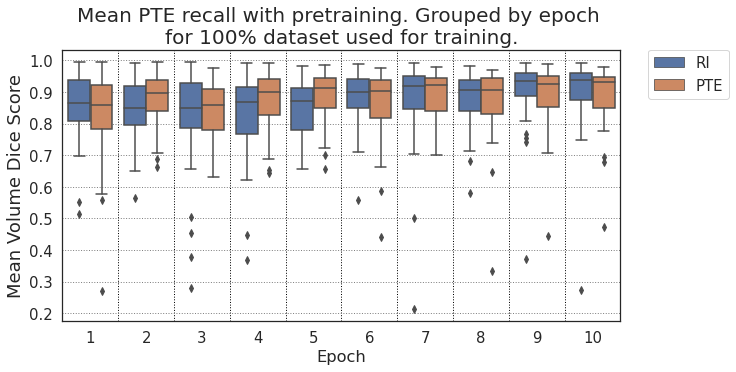

+-------+--------------------+--------------------+
| Epoch |   RI specificity   |  PTE specificity   |
+-------+--------------------+--------------------+
|   0   | 0.9990377335417626 | 0.9995162253506181 |
|   1   | 0.9992626542160513 | 0.9994427002055647 |
|   2   | 0.999668404732008  | 0.999724740568001  |
|   3   | 0.9997023390318736 | 0.9995589922621952 |
|   4   | 0.9997018374515936 | 0.9994973935085595 |
|   5   | 0.9995399462789581 | 0.9996378068974365 |
|   6   | 0.9995014510938133 | 0.9994989138773209 |
|   7   | 0.9995600497239906 | 0.9996257675082317 |
|   8   | 0.9994064789772719 | 0.9994895533095349 |
|   9   | 0.9993913643620704 | 0.999568130624983  |
+-------+--------------------+--------------------+


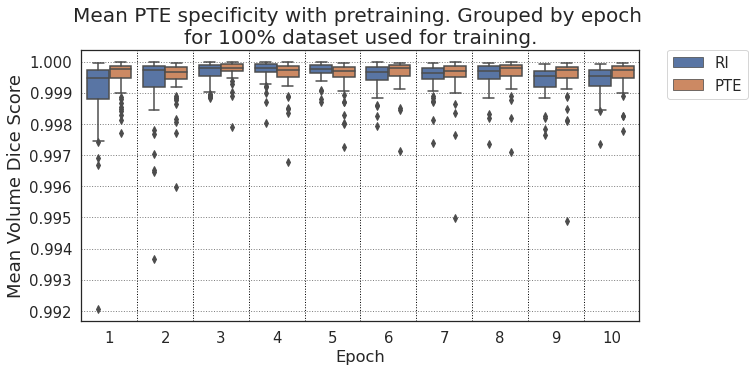


Epoch 4
+-------------+--------------------+--------------------+
|    Metric   |         RI         |        PTE         |
+-------------+--------------------+--------------------+
|     dice    | 0.8966006154905101 | 0.9137360794938589 |
|     hd95    | 5.003900438024283  | 5.794003708320751  |
|  precision  | 0.9640979527957786 | 0.9423510287769372 |
|    recall   | 0.8431438053902176 |  0.89165831908809  |
| specificity | 0.9997018374515936 | 0.9994973935085595 |
+-------------+--------------------+--------------------+

####################################################################################################
####################################################################################################
####################################################################################################


In [11]:
import numpy as np
import os 
import csv
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import MultipleLocator
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv  

from prettytable import PrettyTable

metric_out = []
hd95 = []

from os import listdir
from os.path import isfile, join

epoch_num = 10
output_epoch = 4
folder_list = [[],[]]
in_type = ["RI","PTE"]
index = range(epoch_num)

# recall = sensitivity

col_name = ["1","2",
            "3","4",
            "5","6",
            "7","8",
            "9","10"]
    
for dataset_size in ["10","100"]:
    metrics_table = PrettyTable(['Metric','RI', 'PTE'])
    for metric in ["dice","hd95","precision","recall", "specificity"]:

        x_array = np.array([])
        y_array = np.array([])
        metric_output = []
        
        folder_len = len(listdir(os.getcwd() + "/Test_outputs/Brats_" + in_type[0] + "_D"+dataset_size+"_C100_E10_02/Epoch_"+str(0)+"/Metrics/"))
        
        out_x = np.empty([epoch_num, folder_len])
        out_y = np.empty([epoch_num, folder_len])

        train_data_input = pd.DataFrame(data=None, columns=in_type)

        for val in in_type:
            dice_output = []

            df1 = pd.DataFrame({"RI" : [], "PTE" : []})

            for epoch in range(epoch_num):
                metric_out = []

                x_array = np.array([])
                y_array = np.array([])
#                 if val == "PTE":
                folder_list = [f for f in listdir(os.getcwd() + 
                                      "/Test_outputs/Brats_"+val+"_D"+dataset_size+"_C100_E10_02/Epoch_"+str(epoch)+"/Metrics/") if isfile(join(os.getcwd() + 
                                      "/Test_outputs/Brats_"+val+"_D"+dataset_size+"_C100_E10_02/Epoch_"+str(epoch)+"/Metrics/", f))]
#                 else:
#                      folder_list = [f for f in listdir(os.getcwd() + 
#                                           "/Test_outputs/Brats_"+val+"_D"+dataset_size+"_C100_E10_0/Epoch_"+str(epoch)+"/Metrics/") if isfile(join(os.getcwd() + 
#                                           "/Test_outputs/Brats_"+val+"_D"+dataset_size+"_C100_E10_0/Epoch_"+str(epoch)+"/Metrics/", f))]

                for folder in range(len(folder_list)):
#                     if val == "PTE":
                    with open(os.getcwd() + "/Test_outputs/Brats_"+val+"_D"+dataset_size+"_C100_E10_02/Epoch_"+str(epoch)+"/Metrics/" + folder_list[folder]) as f:
                        reader = csv.DictReader(f)
                        for row in reader:
                            if metric == "specificity":
                                tp, tn, fp, fn = row['TP'], row['TN'], row['FP'], row['FN']

                                specificity = float(tn) / (float(tn) + float(fp))
                                metric_out.append(specificity)
                            else:

                                metric_out.append(row[metric])
#                     else:
#                         with open(os.getcwd() + "/Test_outputs/Brats_"+val+"_D"+dataset_size+"_C100_E10_0/Epoch_"+str(epoch)+"/Metrics/" + folder_list[folder]) as f:
#                             reader = csv.DictReader(f)
#                             for row in reader:
#                                 if metric == "specificity":
#                                     metric_out.append(0.99)
#                                 else:
#                                     metric_out.append(row[metric])
                if val == "RI":
                    x_array = np.append(x_array, metric_out)
                    out_x[epoch] = x_array

                if val == "PTE":
                    y_array = np.append(y_array, metric_out)
                    out_y[epoch] = y_array

                x_array = x_array.astype(np.float)
                y_array = y_array.astype(np.float)

        for var in range(len(out_x)):
            df1 = pd.DataFrame(data = {"Epoch":np.full(len(out_x[var]), col_name[index[var]]),
                                           "RI":out_x[var],"PTE":out_y[var]})#,"PTE":z_array})

            train_data_input = train_data_input.append(df1,ignore_index=True)
            
            t = PrettyTable(['Epoch',"RI " + metric, "PTE " + metric])
            for a in range(epoch_num):
                t.add_row([a, np.mean(out_x[a]), np.mean(out_y[a])])
                
        for f_epoch in [output_epoch]:
            metrics_table.add_row([metric, np.mean(out_x[output_epoch]), np.mean(out_y[output_epoch])])
            print(t)
            metric_out = []
        x_array = np.array([])
        y_array = np.array([])
        

        data = train_data_input.melt('Epoch', var_name='Model Pre-training level', value_name='Mean Dice')
        fig = plt.figure(figsize=(10,5))
        plt.grid()
        ax=sns.boxplot(y='Mean Dice', x='Epoch', hue='Model Pre-training level', data=data)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
        plt.title("Mean " + val + " " + metric + " with pretraining. Grouped by epoch \nfor "+dataset_size+"% dataset used for training."
                 ,fontsize=20)
        if metric == "dice":
            plt.ylim(-0.05,1.05)
        if metric == "hd95":
            plt.ylim(-5,125)
        ax.xaxis.set_minor_locator(MultipleLocator(0.5))
        ax.xaxis.grid(True, which='minor', color='black', lw=1)
        plt.ylabel("Mean Volume Dice Score",fontsize=18)
        plt.show()
    print("")
    print("Epoch " + str(output_epoch))
    print(metrics_table)
    print("")
    print("####################################################################################################")
    print("####################################################################################################")
    print("####################################################################################################")


Regression


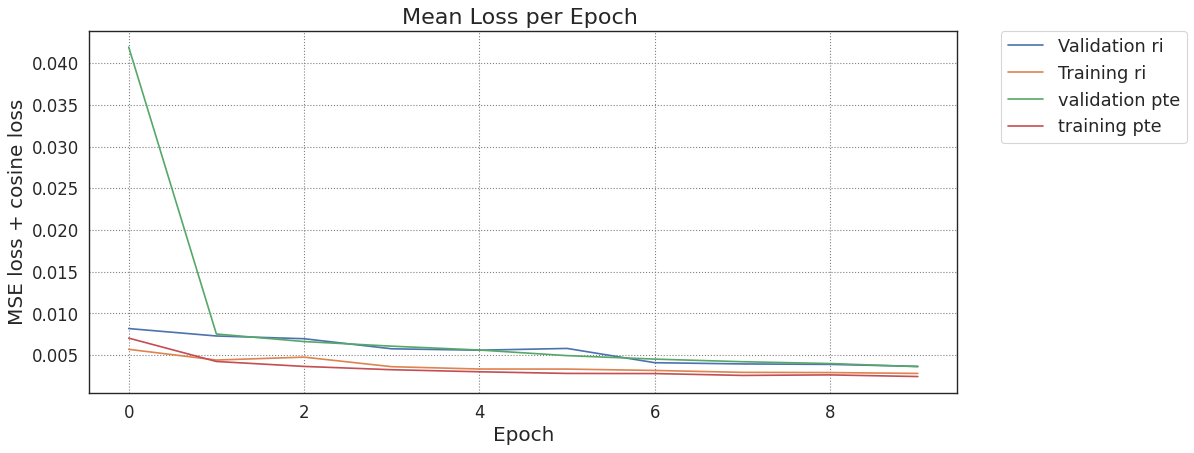

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:81: ConversionWarning: Some errors were detected !
    Line #553 (got 1 columns instead of 8)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:81: ConversionWarning: Some errors were detected !
    Line #553 (got 1 columns instead of 8)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:81: ConversionWarning: Some errors were detected !
    Line #553 (got 1 columns instead of 8)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:81: ConversionWarning: Some errors were detected !
    Line #4970 (got 1 columns instead of 8)


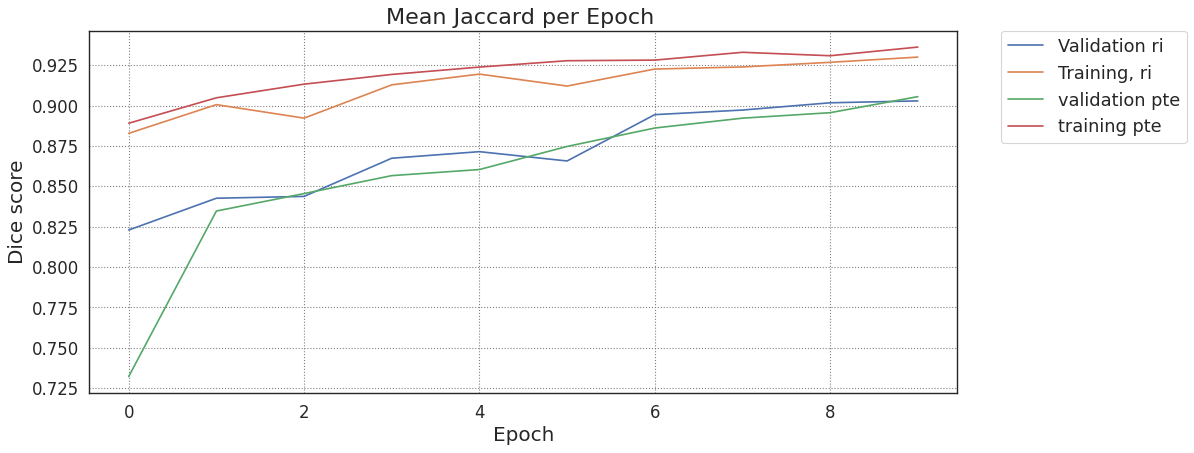

In [53]:




# sort out loss plots for training and validation here with 
# the new file format (will make it easier to transfer the 
# plots to the CT examples when we do this!)

# RANO output loss for both training and validation - over differing penalty types
print("Regression")
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Epochs = 10

sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})

input_names = ["Brats_10_c_100_randomInit_10_epochs", "Brats_100_c_100_pretrained_10_epochs"]
legend_names = ["Validation ri", "Training ri", "validation pte", "training pte"]

output_type = ["validation_loss","training_loss"]
output_axis = ["MSE loss + cosine loss"]
output_title = ["Loss"]
second_out = ["",""]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):

    for s in range(len(input_names)):
        for i in range(Epochs):
            
            loss_0 = np.genfromtxt("Checkpoints/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()    
    
# RANO output loss for both training and validation - over differing penalty types

from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})

input_names = ["Brats_10_c_100_randomInit_10_epochs", "Brats_100_c_100_pretrained_10_epochs"]
legend_names = ["Validation ri", "Training, ri", "validation pte", "training pte"]

output_type = ["validation_dice","training_dice"]
output_axis = ["Dice score"]
output_title = ["Jaccard"]
second_out = ["",""]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):

    #CT_50_c_100_Prano_50_epochs
    
    for s in range(len(input_names)):
        for i in range(Epochs):
            
            loss_0 = np.genfromtxt("Checkpoints/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',', invalid_raise = False)


            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()  

Regression


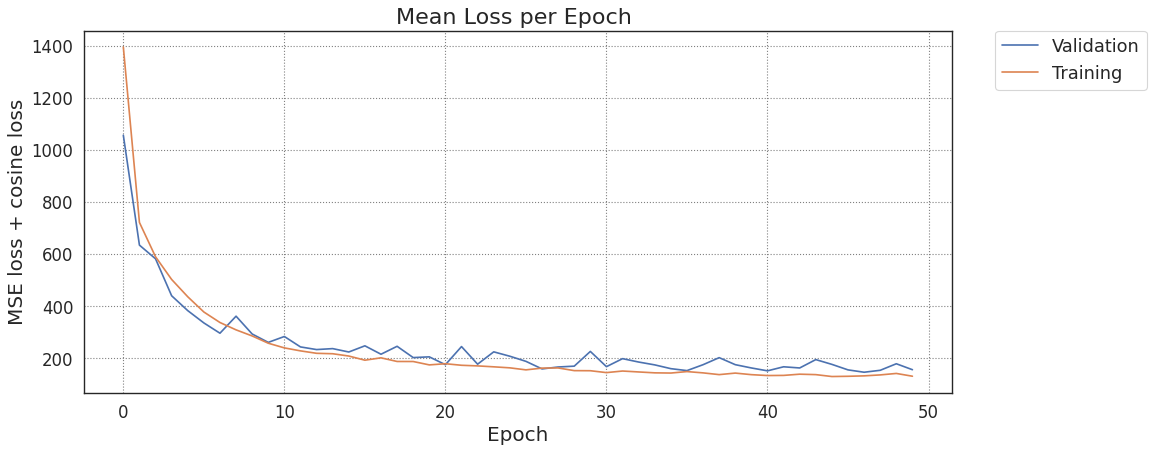

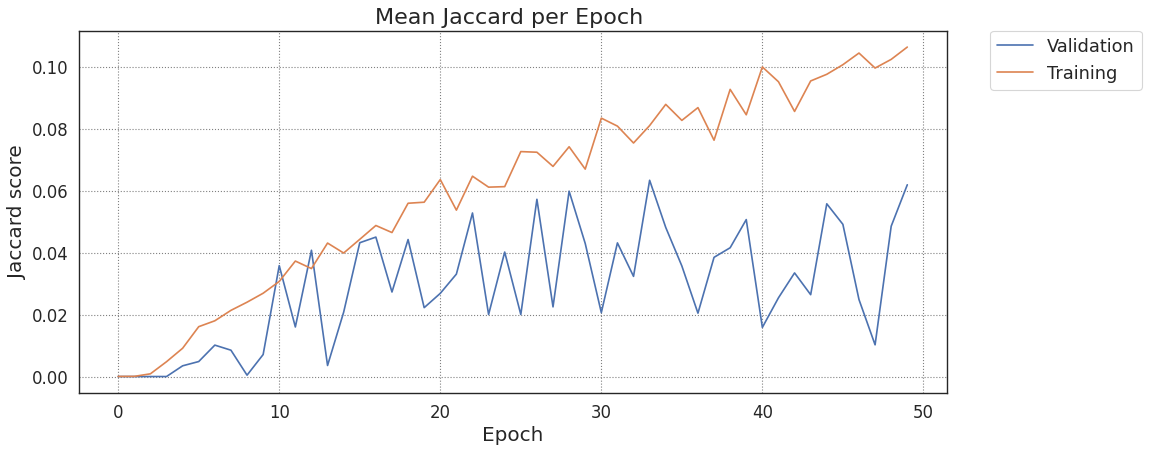

In [9]:
# sort out loss plots for training and validation here with 
# the new file format (will make it easier to transfer the 
# plots to the CT examples when we do this!)

# RANO output loss for both training and validation - over differing penalty types
print("Regression")
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Epochs = 50

sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})

input_names = ["Prano_pretrain_1_C100"]
legend_names = ["Validation", "Training"]

output_type = ["validation_loss","training_loss"]
output_axis = ["MSE loss + cosine loss"]
output_title = ["Loss"]
second_out = ["Validation_loss","Training_loss"]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):

    for s in range(len(input_names)):
        for i in range(Epochs):
            
            loss_0 = np.genfromtxt("Checkpoints_RANO/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()    
    
# RANO output loss for both training and validation - over differing penalty types

from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})

input_names = ["CT_50_c_100_Prano_50_epochs"]
legend_names = ["Validation", "Training"]

output_type = ["validation_jaccard_index","jaccard_index"]
output_axis = ["Jaccard score"]
output_title = ["Jaccard"]
second_out = ["Validation_Jaccard","Training_Jaccard"]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):

    #CT_50_c_100_Prano_50_epochs
    
    for s in range(len(input_names)):
        for i in range(Epochs):
            
            loss_0 = np.genfromtxt("Checkpoints_RANO/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()  

Regression


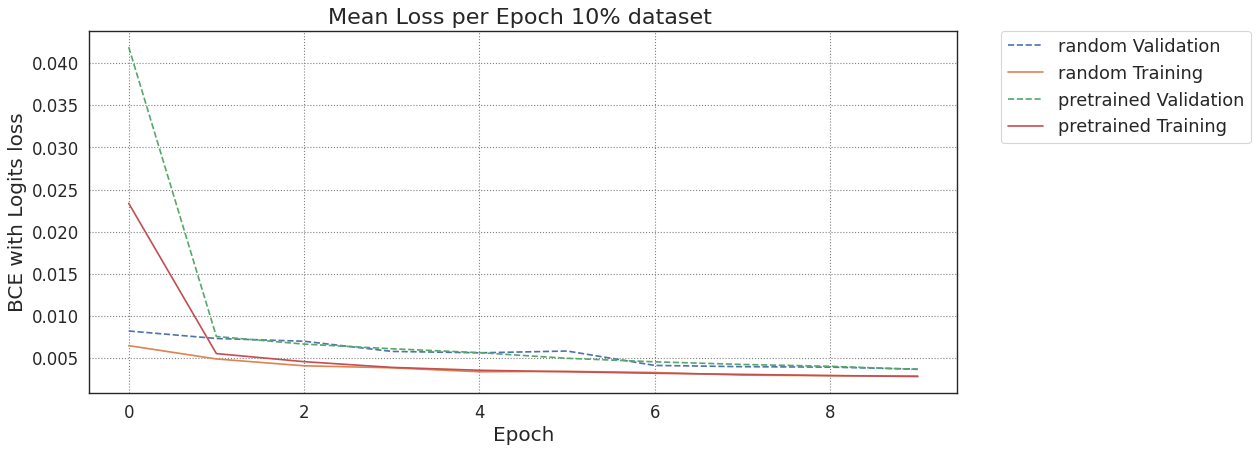

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: ConversionWarning: Some errors were detected !
    Line #553 (got 1 columns instead of 8)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: ConversionWarning: Some errors were detected !
    Line #553 (got 1 columns instead of 8)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: ConversionWarning: Some errors were detected !
    Line #553 (got 1 columns instead of 8)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: ConversionWarning: Some errors were detected !
    Line #553 (got 1 columns instead of 8)


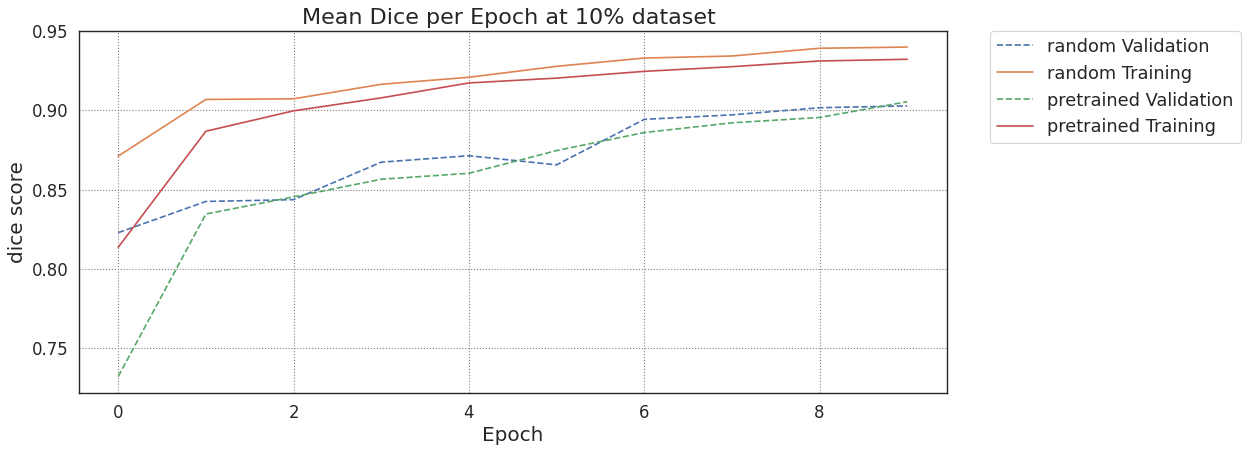

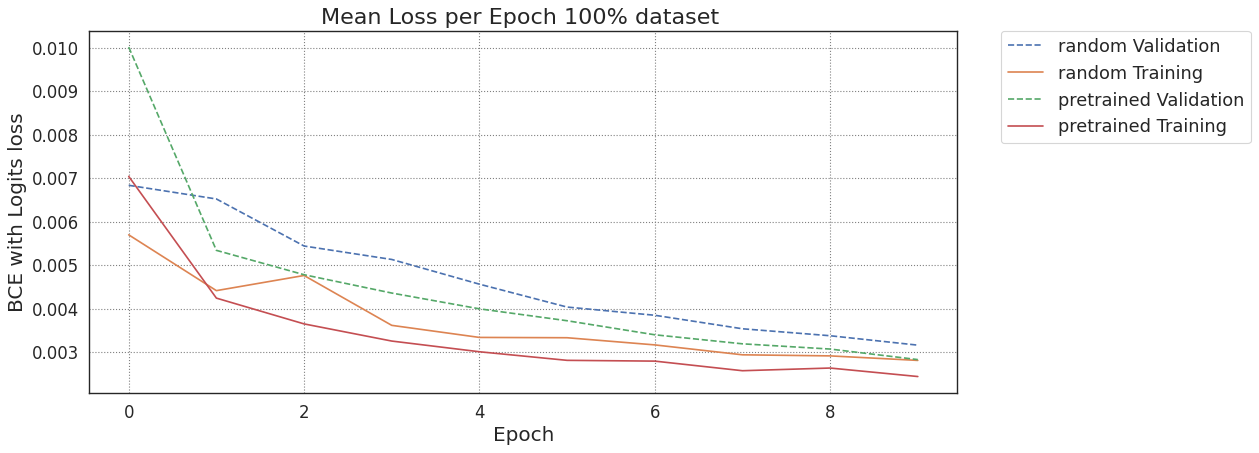

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: ConversionWarning: Some errors were detected !
    Line #553 (got 1 columns instead of 8)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: ConversionWarning: Some errors were detected !
    Line #553 (got 1 columns instead of 8)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: ConversionWarning: Some errors were detected !
    Line #4970 (got 1 columns instead of 8)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: ConversionWarning: Some errors were detected !
    Line #4970 (got 1 columns instead of 8)


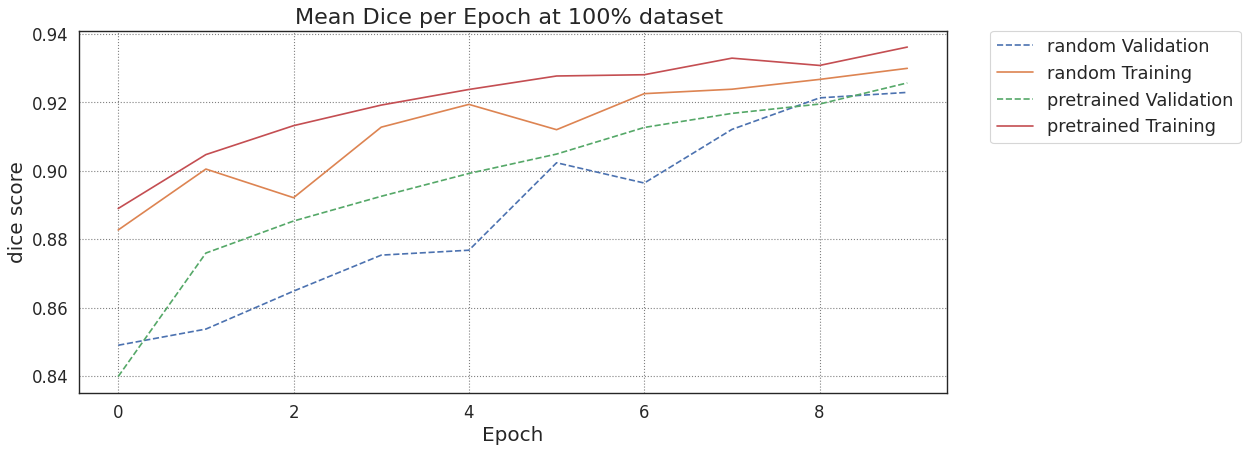

In [29]:
# sort out loss plots for training and validation here with 
# the new file format (will make it easier to transfer the 
# plots to the CT examples when we do this!)

# RANO output loss for both training and validation - over differing penalty types
print("Regression")
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Epochs = 10

sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})
# for value in ["randomInit", "pretrained"]
for var in ["10", "100"]:
    input_names = ["Brats_"+var+"_c_100_randomInit_10_epochs","Brats_"+var+"_c_100_pretrained_10_epochs"]
    legend_names = ["random Validation", "random Training", "pretrained Validation", "pretrained Training"]

    output_type = ["validation_loss","training_loss"]
    output_axis = ["BCE with Logits loss"]
    output_title = ["Loss"]
    second_out = ["",""]

    loss_0 = []
    loss_Nan_0 = []
    figure(figsize=(14, 6), dpi=80)
    ax = plt.subplot()
    for c in range(len(output_type)):
        
        for s in range(len(input_names)):
            for i in range(Epochs):

                loss_0 = np.genfromtxt("Checkpoints/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',', invalid_raise = False)
                loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
                if c > (len(output_type) - 3):
                    loss_Nan_0[i] = loss_Nan_0[i]
            if s == 0:
         
                ax.plot(range(len(loss_Nan_0)),loss_Nan_0,linestyle='dashed')
            else:
                ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
            loss_0 = []
            loss_Nan_0 = []

    plt.title("Mean " + output_title[0] + " per Epoch " + var + "% dataset ",fontsize=20)
    ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
    plt.xlabel("Epoch",fontsize=18)
    plt.ylabel(ylabel=output_axis[0],fontsize=18)
    plt.grid()
    plt.show()    

    # RANO output loss for both training and validation - over differing penalty types

    from matplotlib.pyplot import figure
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd

    sns.set(font_scale = 1.35)
    sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})

#     input_names = ["Brats_"+var+"_c_100_randomInit_10_epochs","Brats_"+var+"_c_100_pretrained_10_epochs"]
#     legend_names = ["random Validation", "random Training", "pretrained Validation", "pretrained Training"]

    output_type = ["validation_dice","training_dice"]
    output_axis = ["dice score"]
    output_title = ["Dice"]
    second_out = ["",""]

    loss_0 = []
    loss_Nan_0 = []
    figure(figsize=(14, 6), dpi=80)
    ax = plt.subplot()
    for c in range(len(output_type)):

        #CT_50_c_100_Prano_50_epochs

        for s in range(len(input_names)):
            for i in range(Epochs):
    #             print(i)
    #             print("Checkpoints/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv")
    #             loss_0 = []
                loss_0 = np.genfromtxt("Checkpoints/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',', invalid_raise = False)
    #             print(loss_0)
                loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
                if c > (len(output_type) - 3):
                    loss_Nan_0[i] = loss_Nan_0[i]

            if s == 0:
         
                ax.plot(range(len(loss_Nan_0)),loss_Nan_0,linestyle='dashed')
            else:
                ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
            loss_0 = []
            loss_Nan_0 = []

    plt.title("Mean " + output_title[0] + " per Epoch at " + var + "% dataset ",fontsize=20)
    ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
    plt.xlabel("Epoch",fontsize=18)
    plt.ylabel(ylabel=output_axis[0],fontsize=18)
    plt.grid()
    plt.show()  

FileNotFoundError: [Errno 2] No such file or directory: '/data/Test_outputs/CT_RI_D10_C100_E10/Epoch_0/Metrics/'

Regression


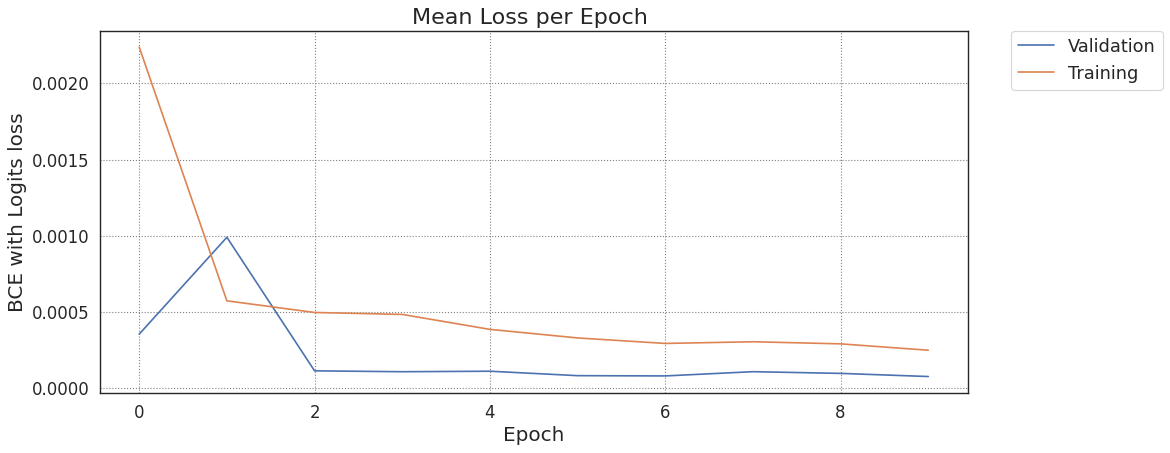

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:83: ConversionWarning: Some errors were detected !
    Line #221 (got 5 columns instead of 8)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:83: ConversionWarning: Some errors were detected !
    Line #1986 (got 5 columns instead of 8)


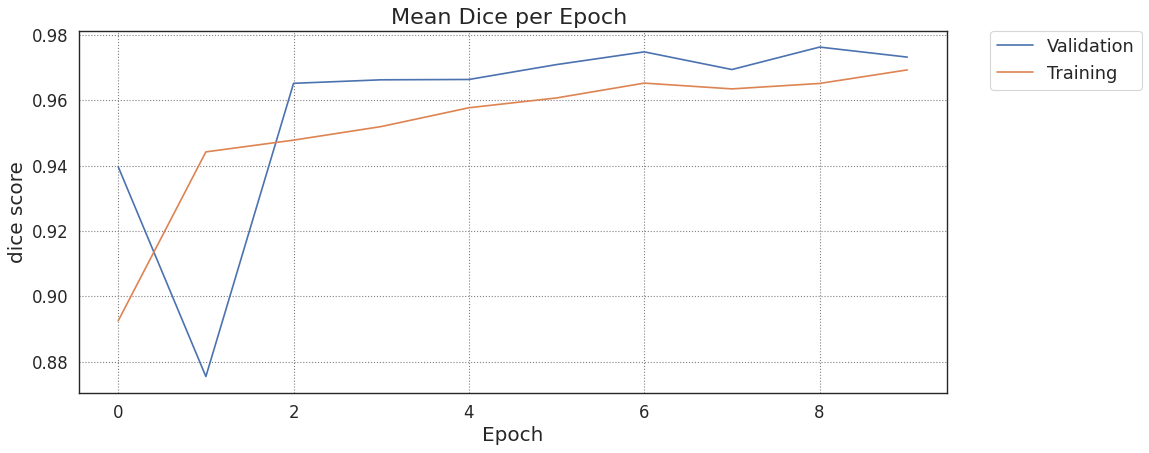

In [16]:
# sort out loss plots for training and validation here with 
# the new file format (will make it easier to transfer the 
# plots to the CT examples when we do this!)

# RANO output loss for both training and validation - over differing penalty types
print("Regression")
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Epochs = 10

sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})

input_names = ["CT_pretrain_100_c_100_Prano_10_epochs"]
legend_names = ["Validation", "Training"]

output_type = ["validation_loss","training_loss"]
output_axis = ["BCE with Logits loss"]
output_title = ["Loss"]
second_out = ["",""]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):

    for s in range(len(input_names)):
        for i in range(Epochs):
            
            loss_0 = np.genfromtxt("Checkpoints/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()    
    
# RANO output loss for both training and validation - over differing penalty types

from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})

input_names = ["CT_pretrain_100_c_100_Prano_10_epochs"]
legend_names = ["Validation", "Training"]

output_type = ["validation_dice","training_dice"]
output_axis = ["dice score"]
output_title = ["Dice"]
second_out = ["",""]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):

    #CT_50_c_100_Prano_50_epochs
    
    for s in range(len(input_names)):
        for i in range(Epochs):
#             print(i)
#             print("Checkpoints/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv")
#             loss_0 = []
            loss_0 = np.genfromtxt("Checkpoints/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',', invalid_raise = False)
#             print(loss_0)
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()  

Regression
training_loss
0
cosine_level_checker_cosine_0_BBox
0
cosine_level_checker_cosine_100_RANO
1
training_loss
1
cosine_level_checker_cosine_0_BBox
0
cosine_level_checker_cosine_100_RANO
1


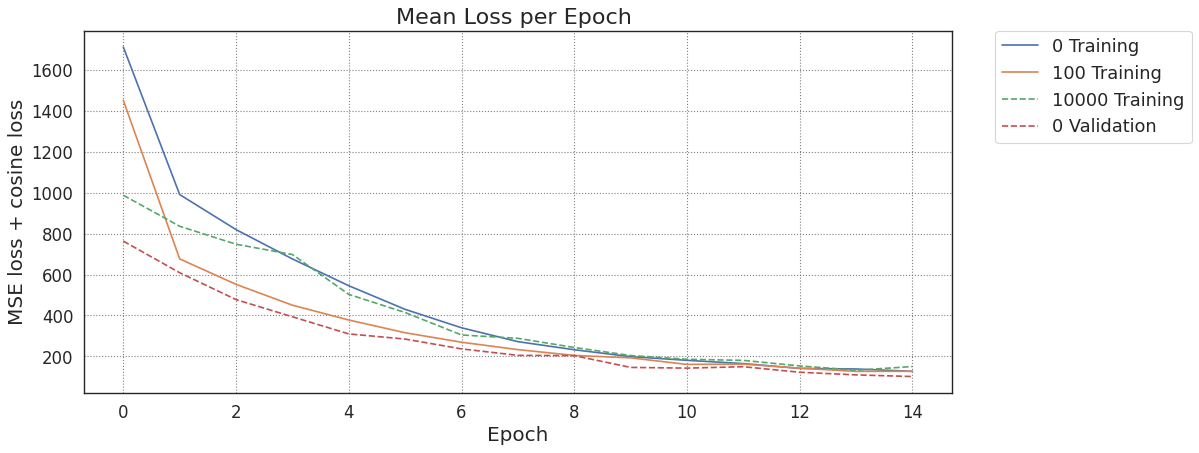

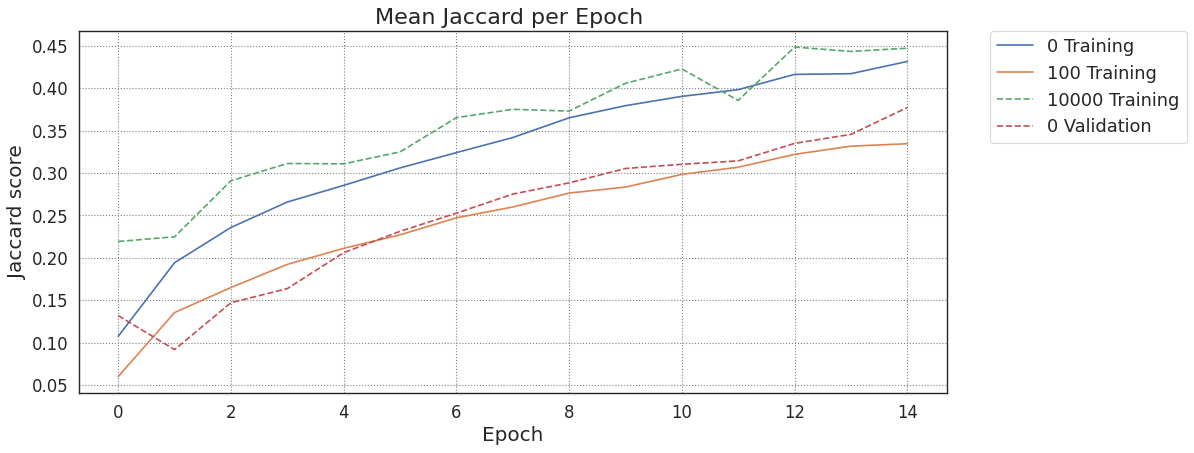

In [12]:
# sort out loss plots for training and validation here with 
# the new file format (will make it easier to transfer the 
# plots to the CT examples when we do this!)

# RANO output loss for both training and validation - over differing penalty types
print("Regression")
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Epochs = 15

sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})

input_names = ["cosine_level_checker_cosine_0_BBox","cosine_level_checker_cosine_100_RANO"]
# input_names = ["Prano_pretrain_1_C100"]
# input_names = ["brats_regress_100_c_10000_Prano_100_epochs"]
#
legend_names = ["0 Training","100 Training" , "10000 Training", "0 Validation", "100 Validation", "10000 Validation"]

output_type = ["training_loss","training_loss"]
output_axis = ["MSE loss + cosine loss"]
output_title = ["Loss"]
second_out = ["Training_loss","Validation_loss"]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):
    print(output_type[c])
    print(c)
    for s in range(len(input_names)):
        print(input_names[s])
        print(s)
        for i in range(Epochs):
            
            loss_0 = np.genfromtxt("Checkpoints_RANO/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        if c == 1:
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0,linestyle='dashed')
        if c == 0:
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()    

output_type = ["training_loss","training_loss"]
output_axis = ["Jaccard score"]
output_title = ["Jaccard"]
second_out = ["Training_Jaccard","Validation_Jaccard"]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):
    for s in range(len(input_names)):
        for i in range(Epochs):
            
            loss_0 = np.genfromtxt("Checkpoints_RANO/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        if c == 1:
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0,linestyle='dashed')
        if c == 0:
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()  

# for some reasont eh values of jaccard for 0 and 10000 are the same, not sure why this is the case but will redo some training to find out,
# also not saving the hyperparameters for rano so need to fix that

In [7]:
# T1, Flair, T1ce, T2

(512, 512)
0.8737698657501248 1.0


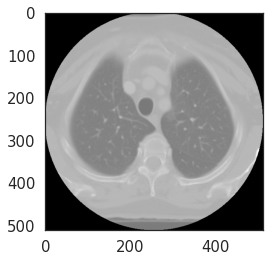

In [19]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

im_frame = Image.open('Datasets/DeepLesion/minideeplesion/000001_01_01/105.png')

print(np.shape(im_frame))
im_frame = im_frame/(np.max(im_frame))
print(np.min(im_frame), np.max(im_frame))
plt.imshow(im_frame,"gray")
plt.show()

In [4]:
%run "Code_UNet_2/Preprocessing/Bounding_box.py"

/data/Datasets/Brats_2018_4/labelsTr/


  0%|          | 0/44175 [00:00<?, ?it/s]

[[139.  95. 146. 102.]
 [  0.   0.   0.   0.]
 [ 57.  98. 102. 178.]
 ...
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [ 96. 107. 120. 137.]]


[0, 0, 0, 0]
0.0 1.0


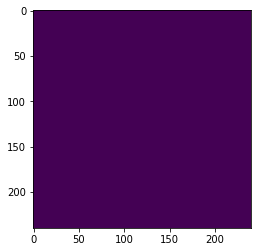

In [2]:
from Code_UNet_2.Code_UNet_Re.Net_modules.Evaluation import Jaccard_Evaluation as Jacc
import matplotlib.pyplot as plt
# bounding_box = [139,  95, 146, 102]
bounding_box = [0,  0, 0, 0]
Jacc.BBox(bounding_box)

plt.show()

Regression
training_loss
0
cosine_level_checker_cosine_0_BBox
0
cosine_level_checker_cosine_0_RANO
1
training_loss
1
cosine_level_checker_cosine_0_BBox
0
cosine_level_checker_cosine_0_RANO
1


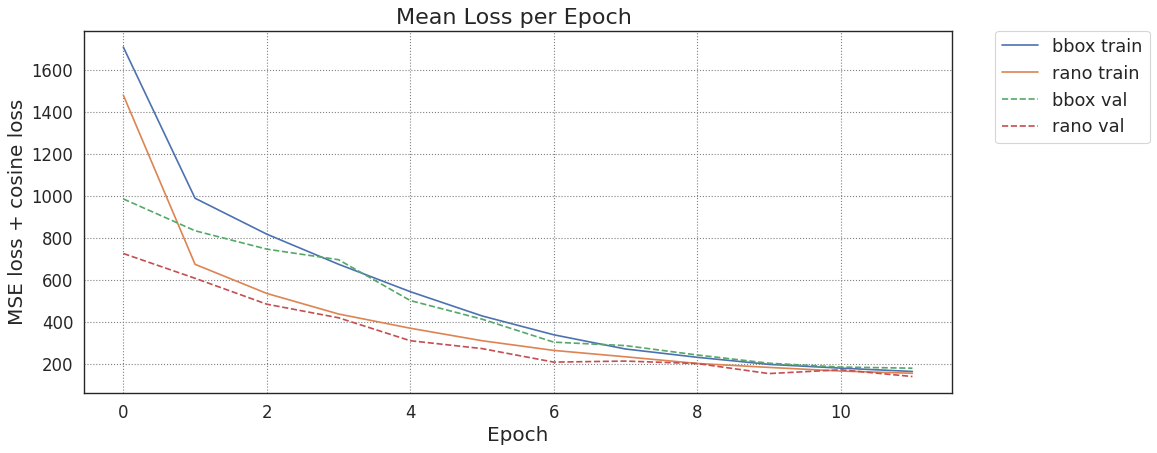

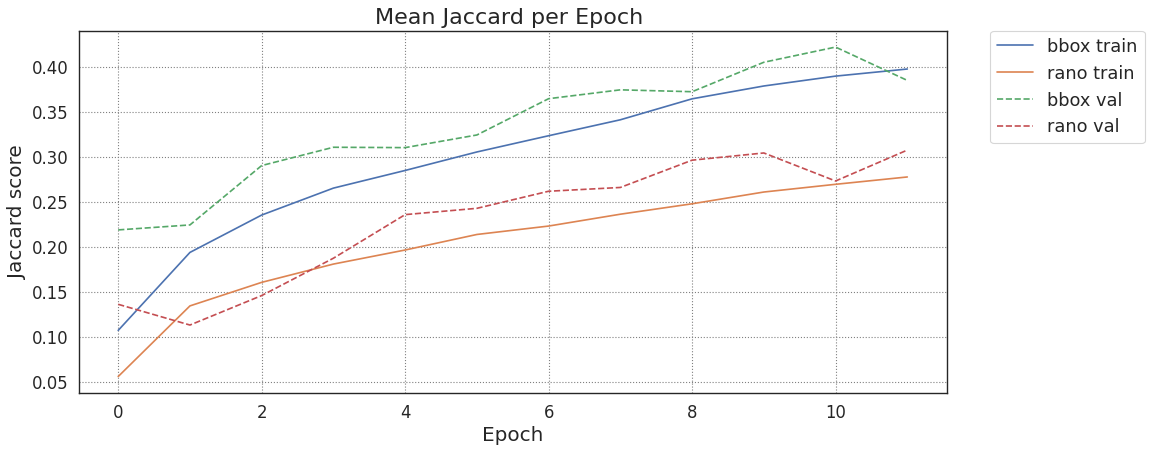

In [15]:
# sort out loss plots for training and validation here with 
# the new file format (will make it easier to transfer the 
# plots to the CT examples when we do this!)

# RANO output loss for both training and validation - over differing penalty types
print("Regression")
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Epochs = 12

sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})

input_names = ["cosine_level_checker_cosine_0_BBox","cosine_level_checker_cosine_0_RANO"]
# input_names = ["Prano_pretrain_1_C100"]
# input_names = ["brats_regress_100_c_10000_Prano_100_epochs"]
#
legend_names = ["bbox train","rano train" , "bbox val", "rano val"]

output_type = ["training_loss","training_loss"]
output_axis = ["MSE loss + cosine loss"]
output_title = ["Loss"]
second_out = ["Training_loss","Validation_loss"]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):
    print(output_type[c])
    print(c)
    for s in range(len(input_names)):
        print(input_names[s])
        print(s)
        for i in range(Epochs):
            
            loss_0 = np.genfromtxt("Checkpoints_RANO/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        if c == 1:
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0,linestyle='dashed')
        if c == 0:
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()    

output_type = ["training_loss","training_loss"]
output_axis = ["Jaccard score"]
output_title = ["Jaccard"]
second_out = ["Training_Jaccard","Validation_Jaccard"]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):
    for s in range(len(input_names)):
        for i in range(Epochs):
            
            loss_0 = np.genfromtxt("Checkpoints_RANO/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        if c == 1:
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0,linestyle='dashed')
        if c == 0:
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()  

# for some reasont eh values of jaccard for 0 and 10000 are the same, not sure why this is the case but will redo some training to find out,
# also not saving the hyperparameters for rano so need to fix that

Regression
training_loss
0
cosine_level_one_nocuda_2
0


OSError: Checkpoints_RANO/Checkpoints/cosine_level_one_nocuda_2/Training_loss/epoch_0training_loss.csv not found.

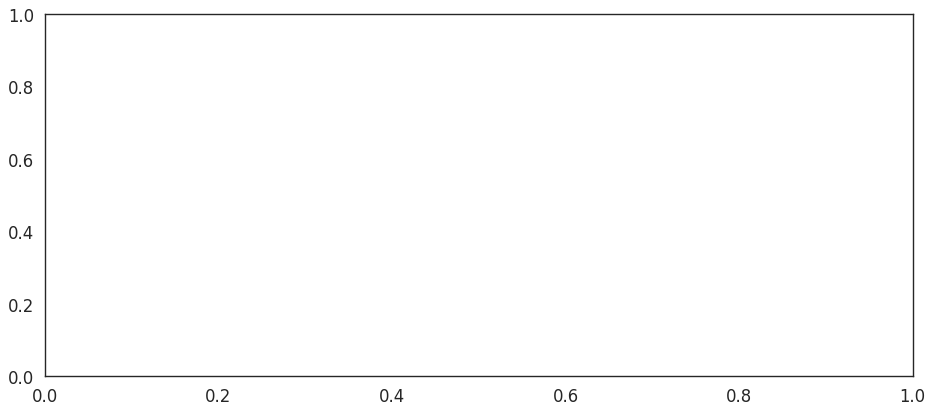

In [40]:
# sort out loss plots for training and validation here with 
# the new file format (will make it easier to transfer the 
# plots to the CT examples when we do this!)

# RANO output loss for both training and validation - over differing penalty types
print("Regression")
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Epochs = 5
sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})

input_names = ["cosine_level_one_nocuda_2","cosine_level_75_sub","cosine_level_100_all"]

# input_names = ["cosine_level_none_2","cosine_level_0","cosine_level_100","cosine_level_one_nocuda_2","cosine_level_50","cosine_level_75_sub","cosine_level_100_all"]

# input_names = ["cosine_level_checker_cosine_0_RANO","cosine_level_checker_cosine_100_RANO"]

# input_names = ["cosine_level_checker_cosine_0_BBox","cosine_level_checker_cosine_0_RANO"]
# input_names = ["Prano_pretrain_1_C100"]
# input_names = ["brats_regress_100_c_10000_Prano_100_epochs"]
#
legend_names = ["none t","75 SUB t","100 t","none v","75 SUB v","100 v"]

output_type = ["training_loss","training_loss"]
output_axis = ["MSE loss + cosine loss"]
output_title = ["Loss"]
second_out = ["Training_loss","Validation_loss"]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):
    print(output_type[c])
    print(c)
    for s in range(len(input_names)):
        print(input_names[s])
        print(s)
        for i in range(Epochs):
            
            loss_0 = np.genfromtxt("Checkpoints_RANO/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        if c == 1:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0,linestyle='dashed')
        if c == 0:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()    

output_type = ["training_loss","training_loss"]
output_axis = ["Jaccard score"]
output_title = ["Jaccard"]
second_out = ["Training_Jaccard","Validation_Jaccard"]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):
    for s in range(len(input_names)):
        for i in range(Epochs):
            
            loss_0 = np.genfromtxt("Checkpoints_RANO/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        if c == 1:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0,linestyle='dashed')
        if c == 0:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()  

# for some reasont eh values of jaccard for 0 and 10000 are the same, not sure why this is the case but will redo some training to find out,
# also not saving the hyperparameters for rano so need to fix that

Regression
training_loss
0
cosine_level_0_all
0
[1480.79136736  674.72034875  536.05586575  438.11169938  370.3176113 ]
cosine_level_100_all
1
[5085.75366459  896.61830255  714.87822928  616.79833448  539.89152025]
cosine_level_1000_all
2
[6885.98945182 6868.26047906 6867.06594019 6867.3222986  6866.6430991 ]
training_loss
1
cosine_level_0_all
0
[726.3080966  608.24651017 484.82246361 420.06538511 310.82686327]
cosine_level_100_all
1
[1454.34482332  936.00495132  801.02376213  621.94394284  499.54030136]
cosine_level_1000_all
2
[7225.58411007 7220.29147967 7219.18971348 7220.52372704 7223.35228826]


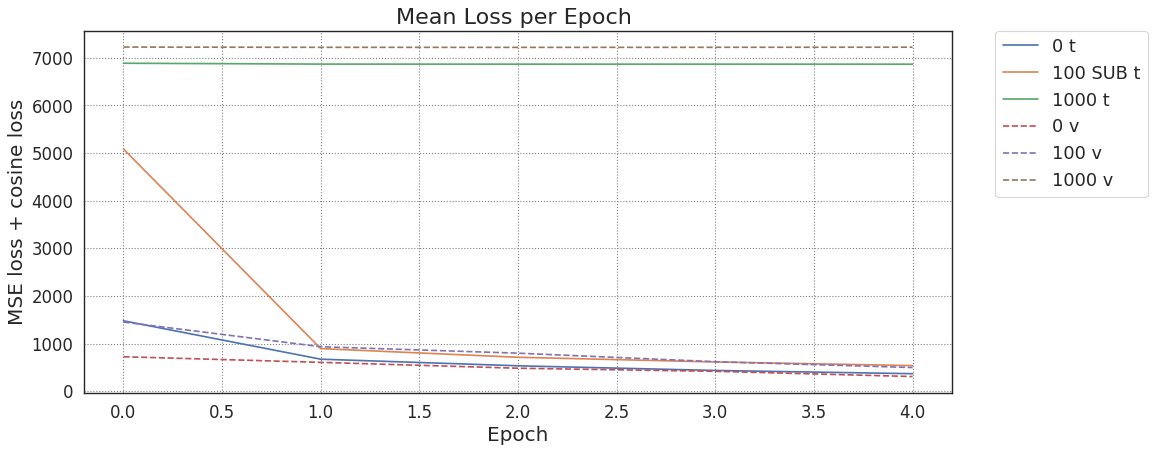

[0.05644812 0.1349286  0.1610918  0.18141348 0.19703982]
[0.03020166 0.07364108 0.09635756 0.09996676 0.109311  ]


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[nan nan nan nan nan]
[0.13669603 0.11366075 0.14641955 0.18792131 0.23636584]
[0.02671937 0.04889107 0.04861332 0.05992687 0.12035295]
[nan nan nan nan nan]


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


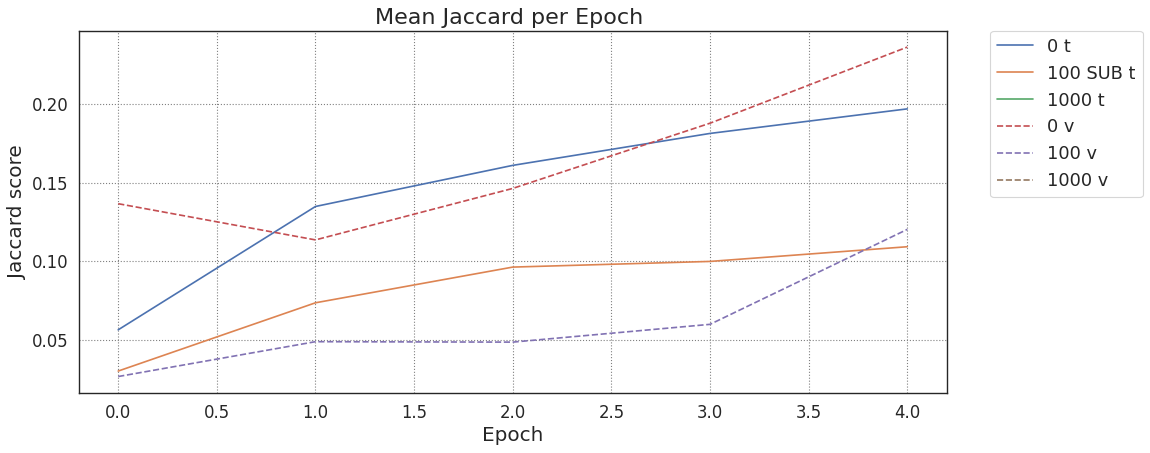

In [41]:
# sort out loss plots for training and validation here with 
# the new file format (will make it easier to transfer the 
# plots to the CT examples when we do this!)

# RANO output loss for both training and validation - over differing penalty types
print("Regression")
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Epochs = 5
sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})

input_names = ["cosine_level_0_all","cosine_level_100_all","cosine_level_1000_all"]

# input_names = ["cosine_level_none_2","cosine_level_0","cosine_level_100","cosine_level_one_nocuda_2","cosine_level_50","cosine_level_75_sub","cosine_level_100_all"]

# input_names = ["cosine_level_checker_cosine_0_RANO","cosine_level_checker_cosine_100_RANO"]

# input_names = ["cosine_level_checker_cosine_0_BBox","cosine_level_checker_cosine_0_RANO"]
# input_names = ["Prano_pretrain_1_C100"]
# input_names = ["brats_regress_100_c_10000_Prano_100_epochs"]
#
legend_names = ["0 t","100 SUB t","1000 t","0 v","100 v","1000 v"]

output_type = ["training_loss","training_loss"]
output_axis = ["MSE loss + cosine loss"]
output_title = ["Loss"]
second_out = ["Training_loss","Validation_loss"]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):
    print(output_type[c])
    print(c)
    for s in range(len(input_names)):
        print(input_names[s])
        print(s)
        for i in range(Epochs):
            
            loss_0 = np.genfromtxt("Checkpoints_RANO/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        if c == 1:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0,linestyle='dashed')
        if c == 0:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()    

output_type = ["training_loss","training_loss"]
output_axis = ["Jaccard score"]
output_title = ["Jaccard"]
second_out = ["Training_Jaccard","Validation_Jaccard"]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):
    for s in range(len(input_names)):
        for i in range(Epochs):
            
            loss_0 = np.genfromtxt("Checkpoints_RANO/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        if c == 1:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0,linestyle='dashed')
        if c == 0:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()  

# for some reasont eh values of jaccard for 0 and 10000 are the same, not sure why this is the case but will redo some training to find out,
# also not saving the hyperparameters for rano so need to fix that

Regression
training_loss
0
cosine_level_0_e100_all
0
[1480.79136736  674.72034875  536.05586575  438.11169938  370.3176113
  310.82966182  264.67698278  234.22948857  202.47222043  183.68376107
  166.28690245  155.79127172  136.29440953  134.1215023   127.82173113
  108.87225099  112.09238203  104.95271952   96.54316472   97.67401785
   91.19665688   87.61362955   83.73075786   76.87175722   82.091884
   74.53145945   79.86104827   67.11974646   74.04480597   74.3761277
   71.17054619   60.93693017   67.1958539    65.51128089   59.9729555
   58.17268078   65.48575535   63.6413989    61.63519671   54.53851467
   58.07952591   60.30976146   54.63525466   51.56878156   57.05278063
   53.53214723   57.7313319    52.1378629    51.00908518   45.48521958
   51.48748349   48.93014577   48.7784542    45.85754045   51.88456423
   49.66266552   49.46372881   48.30466924   45.29434734   48.81022782
   44.09036286   59.0166847    50.65652307   39.15262854   40.6212016
   47.74616165   43.69761482  

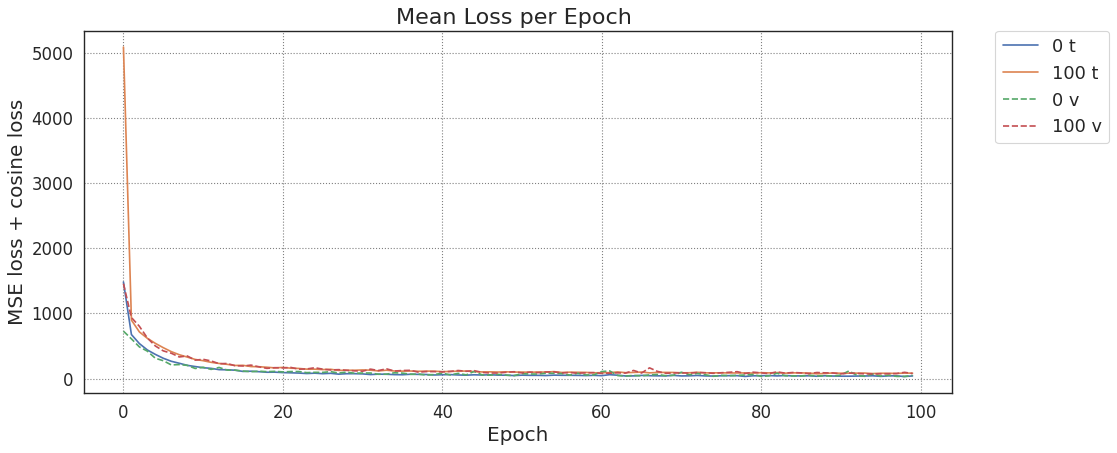

[0.05644812 0.1349286  0.1610918  0.18141348 0.19703982 0.214302
 0.22365587 0.23682402 0.24839377 0.2614707  0.27004448 0.27820471
 0.29404341 0.29556847 0.31138531 0.32086981 0.32462411 0.33386204
 0.34320657 0.3434224  0.3517544  0.36174138 0.36417209 0.37682393
 0.37723506 0.38267109 0.38444228 0.39793767 0.39048027 0.39375586
 0.40294193 0.40667744 0.41040418 0.41366547 0.41862058 0.42269193
 0.41623856 0.42302612 0.43102408 0.43692122 0.43287844 0.43745587
 0.44541975 0.44161729 0.44384776 0.45046294 0.45270895 0.45051415
 0.45115586 0.46457301 0.45530342 0.45827014 0.46170855 0.46491265
 0.46186106 0.46366228 0.46571308 0.47024998 0.46860083 0.46598661
 0.47656938 0.45509782 0.46936618 0.48115213 0.48400439 0.47129953
 0.48378118 0.4802209  0.486062   0.47940044 0.49203508 0.49152855
 0.47963946 0.49120262 0.49733942 0.48337986 0.48602295 0.48660708
 0.50565098 0.49565977 0.48987943 0.48625957 0.50027053 0.48968775
 0.49508076 0.49198759 0.49754718 0.51064208 0.49816063 0.501684

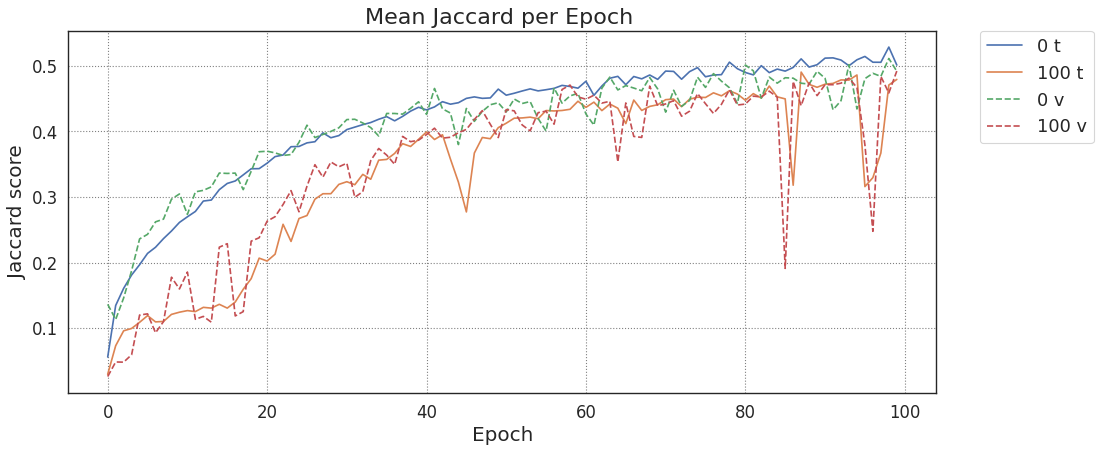

In [13]:
# sort out loss plots for training and validation here with 
# the new file format (will make it easier to transfer the 
# plots to the CT examples when we do this!)

# RANO output loss for both training and validation - over differing penalty types
print("Regression")
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Epochs = 100
sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})

input_names = ["cosine_level_0_e100_all","cosine_level_100_e100_all"]

# input_names = ["cosine_level_none_2","cosine_level_0","cosine_level_100","cosine_level_one_nocuda_2","cosine_level_50","cosine_level_75_sub","cosine_level_100_all"]

# input_names = ["cosine_level_checker_cosine_0_RANO","cosine_level_checker_cosine_100_RANO"]

# input_names = ["cosine_level_checker_cosine_0_BBox","cosine_level_checker_cosine_0_RANO"]
# input_names = ["Prano_pretrain_1_C100"]
# input_names = ["brats_regress_100_c_10000_Prano_100_epochs"]
#
legend_names = ["0 t","100 t","0 v","100 v"]

output_type = ["training_loss","training_loss"]
output_axis = ["MSE loss + cosine loss"]
output_title = ["Loss"]
second_out = ["Training_loss","Validation_loss"]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):
    print(output_type[c])
    print(c)
    for s in range(len(input_names)):
        print(input_names[s])
        print(s)
        for i in range(Epochs):
            
            loss_0 = np.genfromtxt("Checkpoints_RANO/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        if c == 1:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0,linestyle='dashed')
        if c == 0:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()    

output_type = ["training_loss","training_loss"]
output_axis = ["Jaccard score"]
output_title = ["Jaccard"]
second_out = ["Training_Jaccard","Validation_Jaccard"]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):
    for s in range(len(input_names)):
        for i in range(Epochs):
            
            loss_0 = np.genfromtxt("Checkpoints_RANO/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        if c == 1:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0,linestyle='dashed')
        if c == 0:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()  

# for some reasont eh values of jaccard for 0 and 10000 are the same, not sure why this is the case but will redo some training to find out,
# also not saving the hyperparameters for rano so need to fix that

Regression
training_loss
0
cosine_level_0_e100_all
0
[1480.79136736  674.72034875  536.05586575  438.11169938  370.3176113
  310.82966182  264.67698278  234.22948857  202.47222043  183.68376107
  166.28690245  155.79127172  136.29440953  134.1215023   127.82173113
  108.87225099  112.09238203  104.95271952   96.54316472   97.67401785
   91.19665688   87.61362955   83.73075786   76.87175722   82.091884
   74.53145945   79.86104827   67.11974646   74.04480597   74.3761277
   71.17054619   60.93693017   67.1958539    65.51128089   59.9729555
   58.17268078   65.48575535   63.6413989    61.63519671   54.53851467
   58.07952591   60.30976146   54.63525466   51.56878156   57.05278063
   53.53214723   57.7313319    52.1378629    51.00908518   45.48521958]
cosine_level_1_e100_all
1
[1494.68118022  694.46901336  554.30563587  455.84890028  380.23258426
  324.87797281  280.00367618  241.59745592  222.69776675  206.34164775
  183.66840837  173.32026749  159.51684332  143.82588471  140.64474995
  

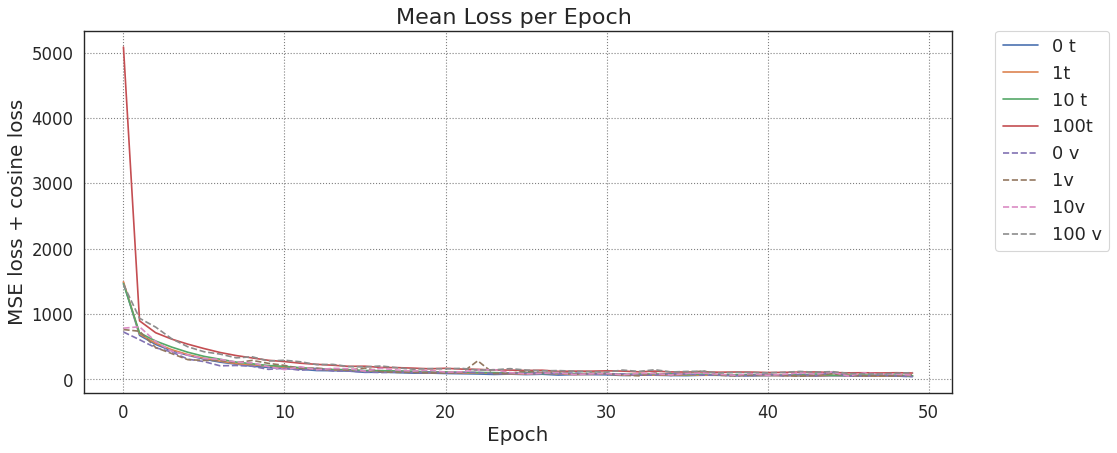

[0.05644812 0.1349286  0.1610918  0.18141348 0.19703982 0.214302
 0.22365587 0.23682402 0.24839377 0.2614707  0.27004448 0.27820471
 0.29404341 0.29556847 0.31138531 0.32086981 0.32462411 0.33386204
 0.34320657 0.3434224  0.3517544  0.36174138 0.36417209 0.37682393
 0.37723506 0.38267109 0.38444228 0.39793767 0.39048027 0.39375586
 0.40294193 0.40667744 0.41040418 0.41366547 0.41862058 0.42269193
 0.41623856 0.42302612 0.43102408 0.43692122 0.43287844 0.43745587
 0.44541975 0.44161729 0.44384776 0.45046294 0.45270895 0.45051415
 0.45115586 0.46457301]
[0.05499268 0.12500237 0.1479     0.16680746 0.18445636 0.19598297
 0.20816544 0.21771045 0.22538988 0.23483801 0.24526424 0.24794084
 0.25347907 0.26680507 0.27218842 0.28333786 0.28383257 0.28867711
 0.29383462 0.30618949 0.30527598 0.3136682  0.31565463 0.32341914
 0.33176355 0.33249689 0.33115086 0.3398439  0.34704881 0.35237606
 0.34873601 0.36110618 0.3577768  0.37281402 0.36419485 0.37096076
 0.38152476 0.37717765 0.37836696 0.3904

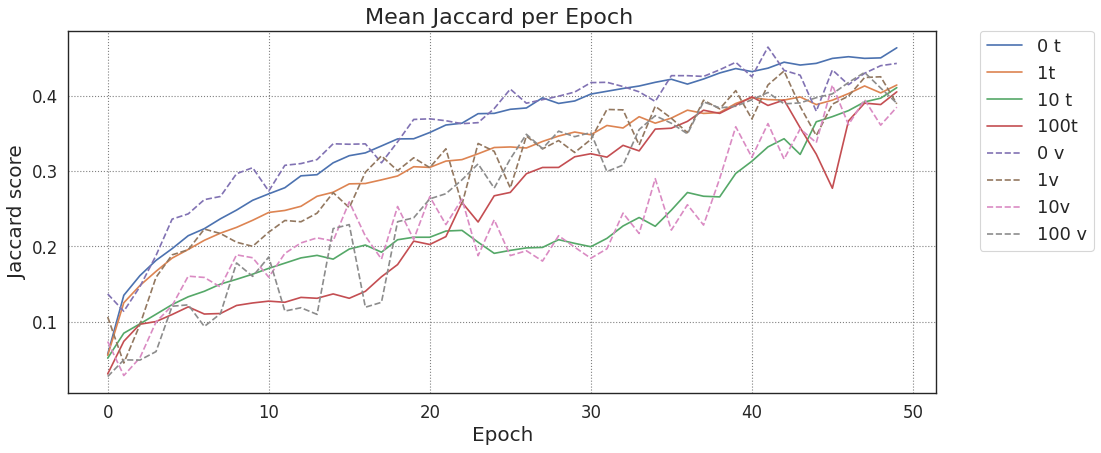

In [14]:
# sort out loss plots for training and validation here with 
# the new file format (will make it easier to transfer the 
# plots to the CT examples when we do this!)

# RANO output loss for both training and validation - over differing penalty types
print("Regression")
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Epochs = 50
sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})

input_names = ["cosine_level_0_e100_all","cosine_level_1_e100_all","cosine_level_10_e100_all","cosine_level_100_e100_all"]

# input_names = ["cosine_level_none_2","cosine_level_0","cosine_level_100","cosine_level_one_nocuda_2","cosine_level_50","cosine_level_75_sub","cosine_level_100_all"]

# input_names = ["cosine_level_checker_cosine_0_RANO","cosine_level_checker_cosine_100_RANO"]

# input_names = ["cosine_level_checker_cosine_0_BBox","cosine_level_checker_cosine_0_RANO"]
# input_names = ["Prano_pretrain_1_C100"]
# input_names = ["brats_regress_100_c_10000_Prano_100_epochs"]
#
legend_names = ["0 t","1t","10 t","100t","0 v","1v","10v","100 v"]

output_type = ["training_loss","training_loss"]
output_axis = ["MSE loss + cosine loss"]
output_title = ["Loss"]
second_out = ["Training_loss","Validation_loss"]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):
    print(output_type[c])
    print(c)
    for s in range(len(input_names)):
        print(input_names[s])
        print(s)
        for i in range(Epochs):
            
            loss_0 = np.genfromtxt("Checkpoints_RANO/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        if c == 1:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0,linestyle='dashed')
        if c == 0:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()    

output_type = ["training_loss","training_loss"]
output_axis = ["Jaccard score"]
output_title = ["Jaccard"]
second_out = ["Training_Jaccard","Validation_Jaccard"]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):
    for s in range(len(input_names)):
        for i in range(Epochs):
            
            loss_0 = np.genfromtxt("Checkpoints_RANO/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        if c == 1:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0,linestyle='dashed')
        if c == 0:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()  

# for some reasont eh values of jaccard for 0 and 10000 are the same, not sure why this is the case but will redo some training to find out,
# also not saving the hyperparameters for rano so need to fix that

Regression
training_loss
0
cosine_absolute_values_c0_e100
0
[1480.79136736  674.72034875  536.05586575  438.11169938  370.3176113
  310.82966182  264.67698278  234.22948857  202.47222043  183.68376107
  166.28690245  155.79127172  136.29440953  134.1215023   127.82173113
  108.87225099  112.09238203  104.95271952   96.54316472   97.67401785
   91.19665688   87.61362955   83.73075786   76.87175722   82.091884
   74.53145945   79.86104827   67.11974646   74.04480597   74.3761277
   71.17054619   60.93693017   67.1958539    65.51128089   59.9729555
   58.17268078   65.48575535   63.6413989    61.63519671   54.53851467
   58.07952591   60.30976146   54.63525466   51.56878156   57.05278063
   53.53214723   57.7313319    52.1378629    51.00908518   45.48521958]
cosine_absolute_values_c100_e100
1
[1563.75157985  729.15732674  590.34671933  502.23653537  436.84757598
  386.60770085  338.12196421  301.94620752  280.12703232  248.35876576
  233.56076217  224.21682351  201.67351419  195.03535265 

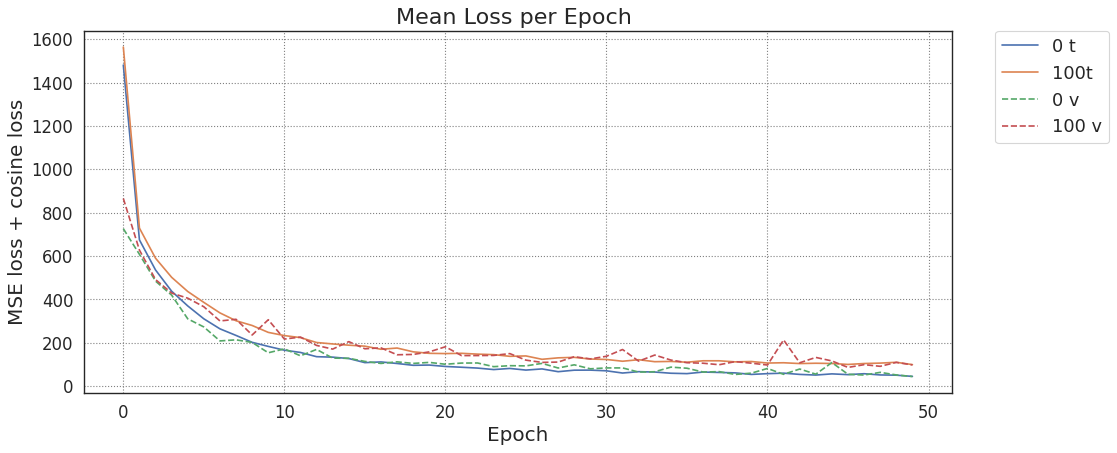

[0.05644812 0.1349286  0.1610918  0.18141348 0.19703982 0.214302
 0.22365587 0.23682402 0.24839377 0.2614707  0.27004448 0.27820471
 0.29404341 0.29556847 0.31138531 0.32086981 0.32462411 0.33386204
 0.34320657 0.3434224  0.3517544  0.36174138 0.36417209 0.37682393
 0.37723506 0.38267109 0.38444228 0.39793767 0.39048027 0.39375586
 0.40294193 0.40667744 0.41040418 0.41366547 0.41862058 0.42269193
 0.41623856 0.42302612 0.43102408 0.43692122 0.43287844 0.43745587
 0.44541975 0.44161729 0.44384776 0.45046294 0.45270895 0.45051415
 0.45115586 0.46457301]
[0.03935607 0.06832603 0.0812816  0.09005521 0.09663106 0.1035384
 0.11337121 0.1281002  0.14404316 0.16993223 0.18119707 0.19389338
 0.19673497 0.21008968 0.22528124 0.22962398 0.24252984 0.24211886
 0.25949563 0.27079992 0.28315047 0.27850004 0.29433822 0.30484524
 0.30958545 0.31527146 0.34442991 0.32814847 0.32903792 0.33593708
 0.35686795 0.37013206 0.35367792 0.37488757 0.37065344 0.37262824
 0.37766176 0.37672466 0.38745699 0.38341

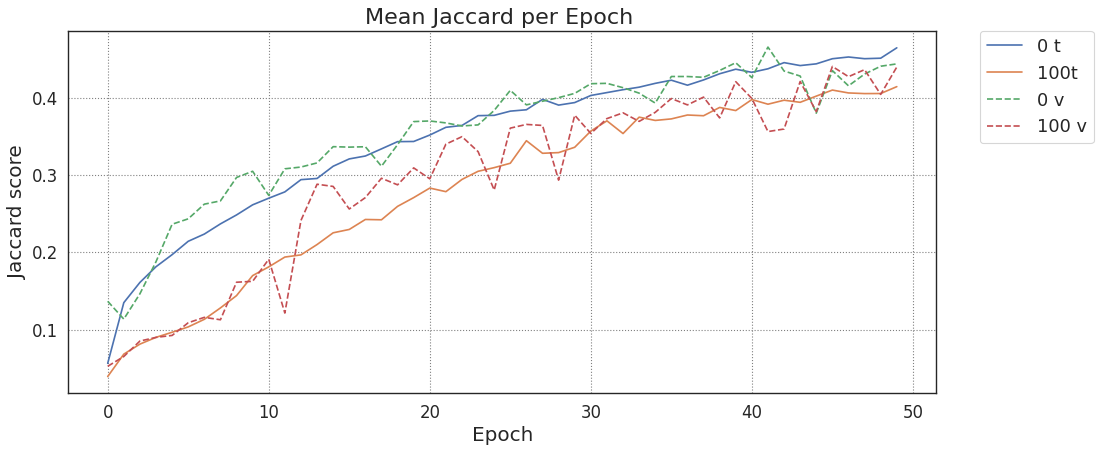

In [22]:
# sort out loss plots for training and validation here with 
# the new file format (will make it easier to transfer the 
# plots to the CT examples when we do this!)

# RANO output loss for both training and validation - over differing penalty types
print("Regression")
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Epochs = 50
sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})

input_names = ["cosine_absolute_values_c0_e100","cosine_absolute_values_c100_e100"]
# input_names = ["cosine_level_0_e100_all","cosine_level_1_e100_all","cosine_level_10_e100_all","cosine_level_100_e100_all"]

# input_names = ["cosine_level_none_2","cosine_level_0","cosine_level_100","cosine_level_one_nocuda_2","cosine_level_50","cosine_level_75_sub","cosine_level_100_all"]

# input_names = ["cosine_level_checker_cosine_0_RANO","cosine_level_checker_cosine_100_RANO"]

# input_names = ["cosine_level_checker_cosine_0_BBox","cosine_level_checker_cosine_0_RANO"]
# input_names = ["Prano_pretrain_1_C100"]
# input_names = ["brats_regress_100_c_10000_Prano_100_epochs"]
#
legend_names = ["0 t","100t","0 v","100 v"]

output_type = ["training_loss","training_loss"]
output_axis = ["MSE loss + cosine loss"]
output_title = ["Loss"]
second_out = ["Training_loss","Validation_loss"]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):
    print(output_type[c])
    print(c)
    for s in range(len(input_names)):
        print(input_names[s])
        print(s)
        for i in range(Epochs):
            
            loss_0 = np.genfromtxt("Checkpoints_RANO/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        if c == 1:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0,linestyle='dashed')
        if c == 0:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()    

output_type = ["training_loss","training_loss"]
output_axis = ["Jaccard score"]
output_title = ["Jaccard"]
second_out = ["Training_Jaccard","Validation_Jaccard"]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):
    for s in range(len(input_names)):
        for i in range(Epochs):
            
            loss_0 = np.genfromtxt("Checkpoints_RANO/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        if c == 1:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0,linestyle='dashed')
        if c == 0:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()  

# for some reasont eh values of jaccard for 0 and 10000 are the same, not sure why this is the case but will redo some training to find out,
# also not saving the hyperparameters for rano so need to fix that

Regression
training_loss
0
cosine_absolute_values_cnone_e100
0
[1480.79136736  674.72034875  536.05586575  438.11169938  370.3176113
  310.82966182  264.67698278  234.22948857  202.47222043  183.68376107
  166.28690245  155.79127172  136.29440953  134.1215023   127.82173113
  108.87225099  112.09238203  104.95271952   96.54316472   97.67401785
   91.19665688   87.61362955   83.73075786   76.87175722   82.091884
   74.53145945   79.86104827   67.11974646   74.04480597   74.3761277
   71.17054619   60.93693017   67.1958539    65.51128089   59.9729555
   58.17268078   65.48575535   63.6413989    61.63519671   54.53851467
   58.07952591   60.30976146   54.63525466   51.56878156   57.05278063
   53.53214723   57.7313319    52.1378629    51.00908518   45.48521958]
cosine_absolute_values_c0_e100
1
[1480.79136736  674.72034875  536.05586575  438.11169938  370.3176113
  310.82966182  264.67698278  234.22948857  202.47222043  183.68376107
  166.28690245  155.79127172  136.29440953  134.1215023  

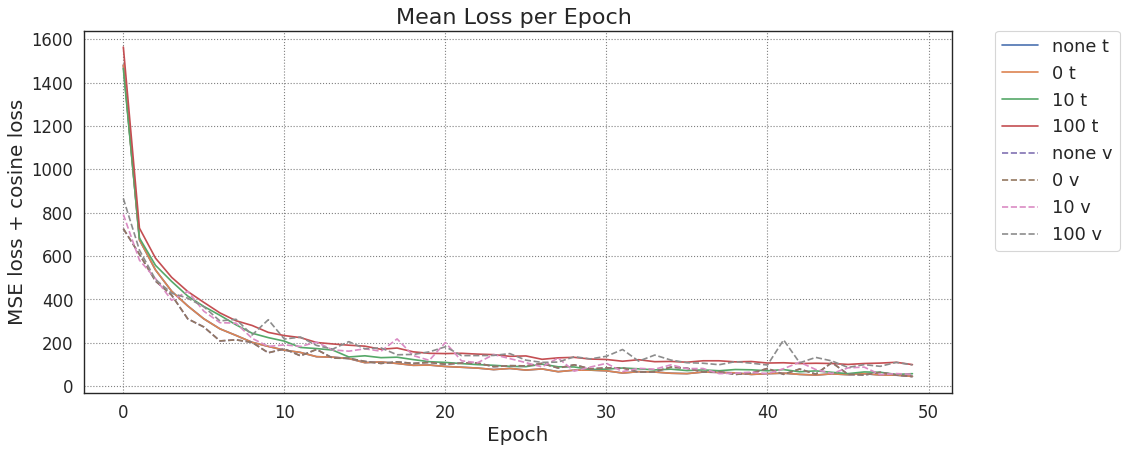

[0.05644812 0.1349286  0.1610918  0.18141348 0.19703982 0.214302
 0.22365587 0.23682402 0.24839377 0.2614707  0.27004448 0.27820471
 0.29404341 0.29556847 0.31138531 0.32086981 0.32462411 0.33386204
 0.34320657 0.3434224  0.3517544  0.36174138 0.36417209 0.37682393
 0.37723506 0.38267109 0.38444228 0.39793767 0.39048027 0.39375586
 0.40294193 0.40667744 0.41040418 0.41366547 0.41862058 0.42269193
 0.41623856 0.42302612 0.43102408 0.43692122 0.43287844 0.43745587
 0.44541975 0.44161729 0.44384776 0.45046294 0.45270895 0.45051415
 0.45115586 0.46457301]
[0.05644812 0.1349286  0.1610918  0.18141348 0.19703982 0.214302
 0.22365587 0.23682402 0.24839377 0.2614707  0.27004448 0.27820471
 0.29404341 0.29556847 0.31138531 0.32086981 0.32462411 0.33386204
 0.34320657 0.3434224  0.3517544  0.36174138 0.36417209 0.37682393
 0.37723506 0.38267109 0.38444228 0.39793767 0.39048027 0.39375586
 0.40294193 0.40667744 0.41040418 0.41366547 0.41862058 0.42269193
 0.41623856 0.42302612 0.43102408 0.436921

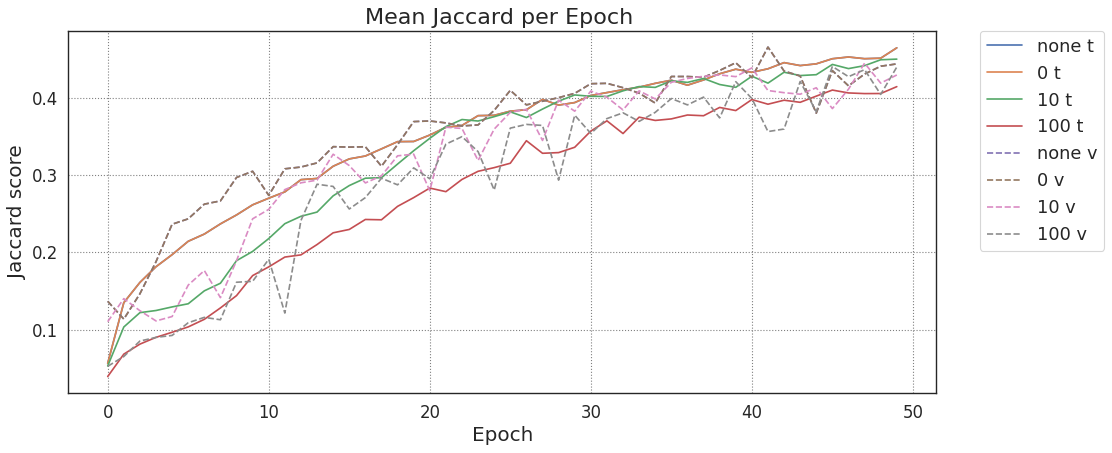

In [25]:
# sort out loss plots for training and validation here with 
# the new file format (will make it easier to transfer the 
# plots to the CT examples when we do this!)

# RANO output loss for both training and validation - over differing penalty types
print("Regression")
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Epochs = 50
sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})



input_names = ["cosine_absolute_values_cnone_e100",
               "cosine_absolute_values_c0_e100",
               "cosine_absolute_values_c10_e100",
               "cosine_absolute_values_c100_e100"]
# input_names = ["cosine_level_0_e100_all","cosine_level_1_e100_all","cosine_level_10_e100_all","cosine_level_100_e100_all"]

# input_names = ["cosine_level_none_2","cosine_level_0","cosine_level_100","cosine_level_one_nocuda_2","cosine_level_50","cosine_level_75_sub","cosine_level_100_all"]

# input_names = ["cosine_level_checker_cosine_0_RANO","cosine_level_checker_cosine_100_RANO"]

# input_names = ["cosine_level_checker_cosine_0_BBox","cosine_level_checker_cosine_0_RANO"]
# input_names = ["Prano_pretrain_1_C100"]
# input_names = ["brats_regress_100_c_10000_Prano_100_epochs"]
#
legend_names = ["none t","0 t","10 t","100 t","none v","0 v","10 v","100 v"]

output_type = ["training_loss","training_loss"]
output_axis = ["MSE loss + cosine loss"]
output_title = ["Loss"]
second_out = ["Training_loss","Validation_loss"]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):
    print(output_type[c])
    print(c)
    for s in range(len(input_names)):
        print(input_names[s])
        print(s)
        for i in range(Epochs):
            
            loss_0 = np.genfromtxt("Checkpoints_RANO/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        if c == 1:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0,linestyle='dashed')
        if c == 0:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()    

output_type = ["training_loss","training_loss"]
output_axis = ["Jaccard score"]
output_title = ["Jaccard"]
second_out = ["Training_Jaccard","Validation_Jaccard"]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):
    for s in range(len(input_names)):
        for i in range(Epochs):
            
            loss_0 = np.genfromtxt("Checkpoints_RANO/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        if c == 1:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0,linestyle='dashed')
        if c == 0:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()  

# for some reasont eh values of jaccard for 0 and 10000 are the same, not sure why this is the case but will redo some training to find out,
# also not saving the hyperparameters for rano so need to fix that

Regression
training_loss
0
cosine_absolute_values_c_0_e100_Continue
0
[55.14988755 55.92687444 57.62920331 46.92508413 47.1090185  58.85651266
 53.83744709 54.38689429 48.43844391 54.42734918 42.41774918 54.59878726
 41.48861372 48.47411469 38.65810086 45.07190104 48.46398878 43.28996532
 44.34305477 51.66540825 46.62159935 44.51820757 39.65131718 36.43928347
 47.91781031 39.96399961 40.573082   43.74561113 49.30739497 49.16837059
 36.05274243 46.62885478 42.54459202 44.43021601 46.4134736  38.16929917
 46.19599671 36.7949123  42.32768677 31.8764605  40.38415907 39.63994361
 44.96759614 39.94398978 49.76099676 43.7903527  45.43807275 34.97134833
 41.21977194]
cosine_absolute_values_c_1_e100_Continue
1
[55.39032891 50.82088505 53.04075079 53.00701061 55.14065847 49.16939791
 51.48967767 52.11519785 48.3717554  43.56176041 50.654481   53.16458663
 48.33025778 45.98713648 45.31820785 43.21380833 44.87562928 40.29557001
 43.04876878 47.54849732 47.21217954 45.42959428 53.44519298 42.972270

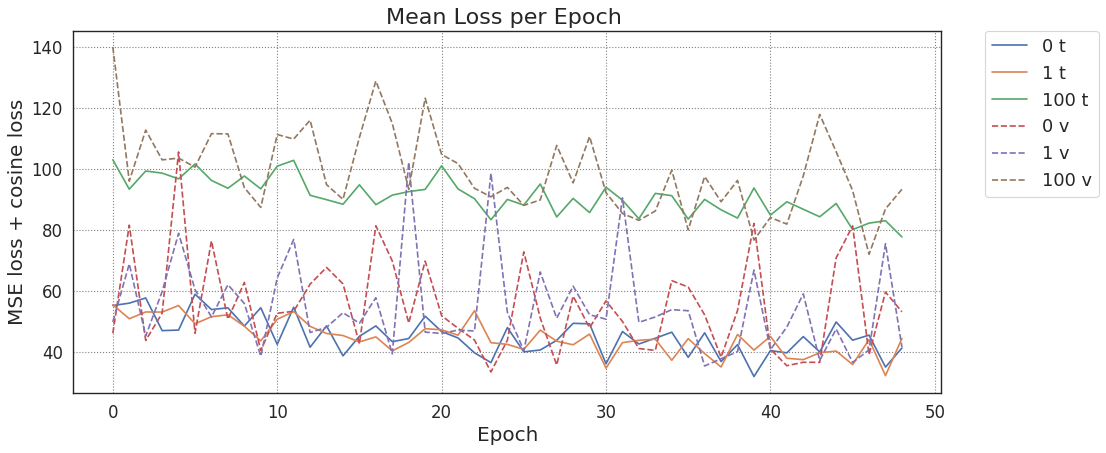

[0.43940247 0.44537484 0.4397859  0.45348996 0.45596088 0.44797382
 0.4496803  0.45583005 0.46137886 0.45396973 0.4706918  0.45507584
 0.47288704 0.46391497 0.48289373 0.47187726 0.47274639 0.47778018
 0.47126126 0.4684951  0.4737041  0.47449491 0.48367316 0.4979301
 0.46993745 0.48927906 0.48110366 0.48049545 0.48405898 0.47853382
 0.50562702 0.48097569 0.49011755 0.48135444 0.48620354 0.500329
 0.48447108 0.49488227 0.48888806 0.50996144 0.49475992 0.49895574
 0.48944103 0.49781274 0.48374838 0.49101864 0.48892138 0.51395555
 0.49952802]
[0.43835106 0.44557252 0.44484177 0.44117829 0.44357181 0.45510497
 0.45055611 0.45218369 0.45743339 0.46465072 0.46172789 0.45763526
 0.463161   0.46572132 0.47164469 0.47633988 0.47331221 0.48445052
 0.47254999 0.47048625 0.4727459  0.4799218  0.46105724 0.47784515
 0.4868     0.48585566 0.47644116 0.48752194 0.48180756 0.48261084
 0.49767275 0.48233009 0.49554194 0.47931535 0.50102522 0.48260588
 0.49299099 0.50385033 0.48369835 0.49316607 0.48865

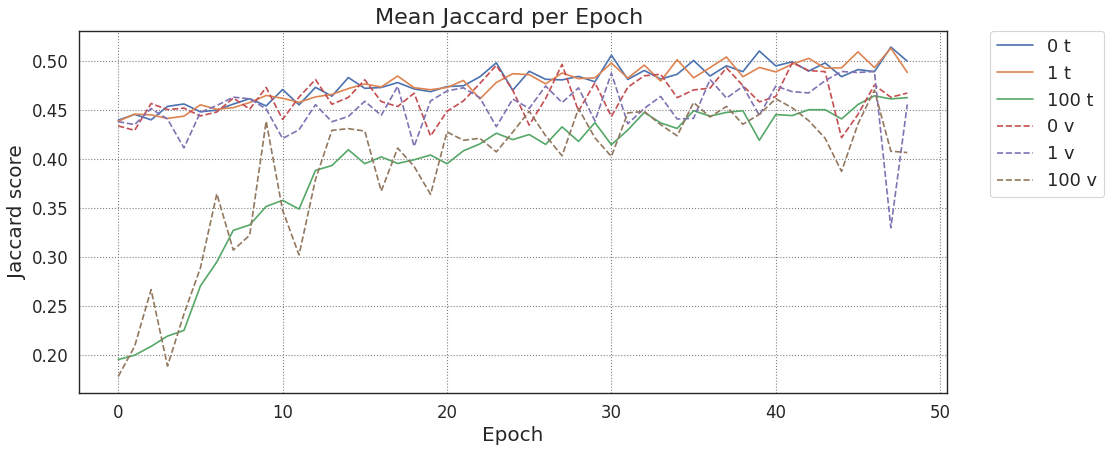

In [12]:
# sort out loss plots for training and validation here with 
# the new file format (will make it easier to transfer the 
# plots to the CT examples when we do this!)

# RANO output loss for both training and validation - over differing penalty types
print("Regression")
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Epochs = 49
sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})

input_names = ["cosine_absolute_values_c_0_e100_Continue",
               "cosine_absolute_values_c_1_e100_Continue",
               "cosine_absolute_values_c_100_e100_Continue"]

#                "cosine_absolute_values_c10_e100",
#                "cosine_absolute_values_c100_e100"]
# input_names = ["cosine_level_0_e100_all","cosine_level_1_e100_all","cosine_level_10_e100_all","cosine_level_100_e100_all"]

# input_names = ["cosine_level_none_2","cosine_level_0","cosine_level_100","cosine_level_one_nocuda_2","cosine_level_50","cosine_level_75_sub","cosine_level_100_all"]

# input_names = ["cosine_level_checker_cosine_0_RANO","cosine_level_checker_cosine_100_RANO"]

# input_names = ["cosine_level_checker_cosine_0_BBox","cosine_level_checker_cosine_0_RANO"]
# input_names = ["Prano_pretrain_1_C100"]
# input_names = ["brats_regress_100_c_10000_Prano_100_epochs"]
#
legend_names = ["0 t","1 t","100 t","0 v","1 v","100 v"]

output_type = ["training_loss","training_loss"]
output_axis = ["MSE loss + cosine loss"]
output_title = ["Loss"]
second_out = ["Training_loss","Validation_loss"]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):
    print(output_type[c])
    print(c)
    for s in range(len(input_names)):
        print(input_names[s])
        print(s)
        for i in range(Epochs):

            loss_0 = np.genfromtxt("Checkpoints_RANO/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i + 1)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        if c == 1:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0,linestyle='dashed')
        if c == 0:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()    

output_type = ["training_loss","training_loss"]
output_axis = ["Jaccard score"]
output_title = ["Jaccard"]
second_out = ["Training_Jaccard","Validation_Jaccard"]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):
    for s in range(len(input_names)):
        for i in range(Epochs):
            loss_0 = np.genfromtxt("Checkpoints_RANO/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i + 1)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        if c == 1:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0,linestyle='dashed')
        if c == 0:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()  

# for some reasont eh values of jaccard for 0 and 10000 are the same, not sure why this is the case but will redo some training to find out,
# also not saving the hyperparameters for rano so need to fix that

Regression
training_loss
0
cosine_absolute_values_c_0_e100_Continue
0
[55.14988755 55.92687444 57.62920331 46.92508413 47.1090185  58.85651266
 53.83744709 54.38689429 48.43844391 54.42734918 42.41774918 54.59878726
 41.48861372 48.47411469 38.65810086 45.07190104 48.46398878 43.28996532
 44.34305477 51.66540825 46.62159935 44.51820757 39.65131718 36.43928347
 47.91781031 39.96399961 40.573082   43.74561113 49.30739497 49.16837059
 36.05274243 46.62885478 42.54459202 44.43021601 46.4134736  38.16929917
 46.19599671 36.7949123  42.32768677 31.8764605  40.38415907 39.63994361
 44.96759614 39.94398978 49.76099676 43.7903527  45.43807275 34.97134833
 41.21977194]
cosine_absolute_values_c_1_e100_Continue
1
[55.39032891 50.82088505 53.04075079 53.00701061 55.14065847 49.16939791
 51.48967767 52.11519785 48.3717554  43.56176041 50.654481   53.16458663
 48.33025778 45.98713648 45.31820785 43.21380833 44.87562928 40.29557001
 43.04876878 47.54849732 47.21217954 45.42959428 53.44519298 42.972270

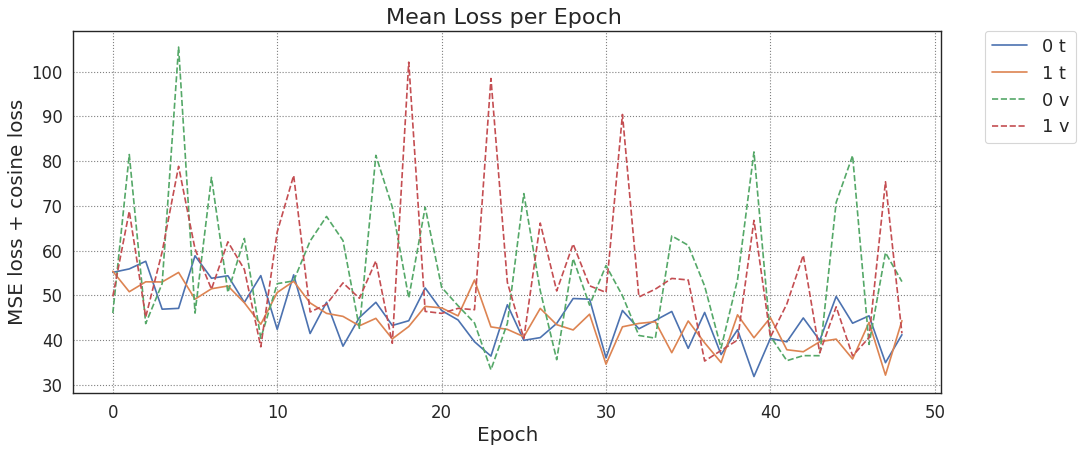

[0.43940247 0.44537484 0.4397859  0.45348996 0.45596088 0.44797382
 0.4496803  0.45583005 0.46137886 0.45396973 0.4706918  0.45507584
 0.47288704 0.46391497 0.48289373 0.47187726 0.47274639 0.47778018
 0.47126126 0.4684951  0.4737041  0.47449491 0.48367316 0.4979301
 0.46993745 0.48927906 0.48110366 0.48049545 0.48405898 0.47853382
 0.50562702 0.48097569 0.49011755 0.48135444 0.48620354 0.500329
 0.48447108 0.49488227 0.48888806 0.50996144 0.49475992 0.49895574
 0.48944103 0.49781274 0.48374838 0.49101864 0.48892138 0.51395555
 0.49952802]
[0.43835106 0.44557252 0.44484177 0.44117829 0.44357181 0.45510497
 0.45055611 0.45218369 0.45743339 0.46465072 0.46172789 0.45763526
 0.463161   0.46572132 0.47164469 0.47633988 0.47331221 0.48445052
 0.47254999 0.47048625 0.4727459  0.4799218  0.46105724 0.47784515
 0.4868     0.48585566 0.47644116 0.48752194 0.48180756 0.48261084
 0.49767275 0.48233009 0.49554194 0.47931535 0.50102522 0.48260588
 0.49299099 0.50385033 0.48369835 0.49316607 0.48865

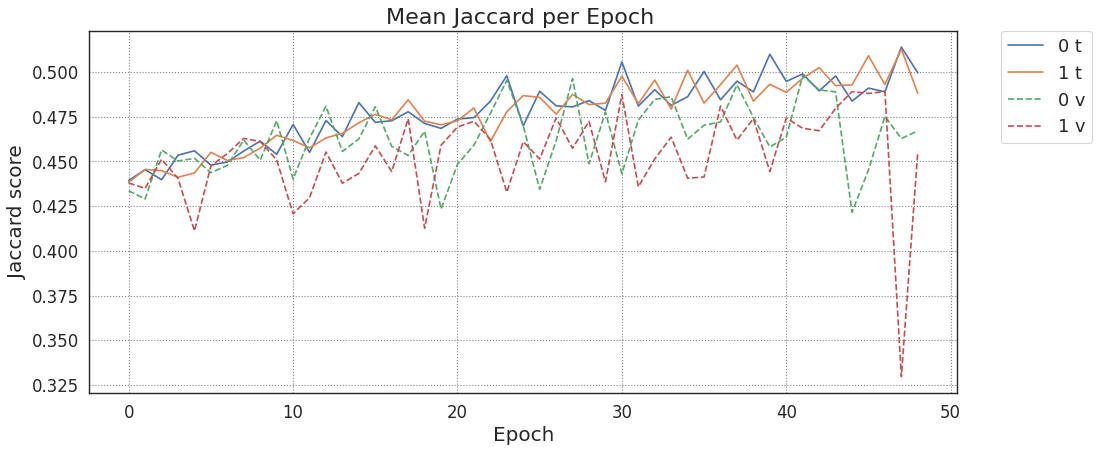

In [27]:
# sort out loss plots for training and validation here with 
# the new file format (will make it easier to transfer the 
# plots to the CT examples when we do this!)

# RANO output loss for both training and validation - over differing penalty types
print("Regression")
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Epochs = 49
sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})

input_names = ["cosine_absolute_values_c_0_e100_Continue",
               "cosine_absolute_values_c_1_e100_Continue"]#,
#                "cosine_absolute_values_c_10_e100_Continue"]

#                "cosine_absolute_values_c10_e100",
#                "cosine_absolute_values_c100_e100"]
# input_names = ["cosine_level_0_e100_all","cosine_level_1_e100_all","cosine_level_10_e100_all","cosine_level_100_e100_all"]

# input_names = ["cosine_level_none_2","cosine_level_0","cosine_level_100","cosine_level_one_nocuda_2","cosine_level_50","cosine_level_75_sub","cosine_level_100_all"]

# input_names = ["cosine_level_checker_cosine_0_RANO","cosine_level_checker_cosine_100_RANO"]

# input_names = ["cosine_level_checker_cosine_0_BBox","cosine_level_checker_cosine_0_RANO"]
# input_names = ["Prano_pretrain_1_C100"]
# input_names = ["brats_regress_100_c_10000_Prano_100_epochs"]
#
legend_names = ["0 t","1 t","0 v","1 v"]

output_type = ["training_loss","training_loss"]
output_axis = ["MSE loss + cosine loss"]
output_title = ["Loss"]
second_out = ["Training_loss","Validation_loss"]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):
    print(output_type[c])
    print(c)
    for s in range(len(input_names)):
        print(input_names[s])
        print(s)
        for i in range(Epochs):

            loss_0 = np.genfromtxt("Checkpoints_RANO/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i + 1)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        if c == 1:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0,linestyle='dashed')
        if c == 0:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()    

output_type = ["training_loss","training_loss"]
output_axis = ["Jaccard score"]
output_title = ["Jaccard"]
second_out = ["Training_Jaccard","Validation_Jaccard"]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):
    for s in range(len(input_names)):
        for i in range(Epochs):
            loss_0 = np.genfromtxt("Checkpoints_RANO/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i + 1)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        if c == 1:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0,linestyle='dashed')
        if c == 0:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()  

Regression
training_loss
0
cosine_absolute_values_c_0_e100_Continue
0
[55.14988755 55.92687444 57.62920331 46.92508413 47.1090185  58.85651266
 53.83744709 54.38689429 48.43844391 54.42734918 42.41774918 54.59878726
 41.48861372 48.47411469 38.65810086 45.07190104 48.46398878 43.28996532
 44.34305477 51.66540825 46.62159935 44.51820757 39.65131718 36.43928347
 47.91781031 39.96399961 40.573082   43.74561113 49.30739497 49.16837059
 36.05274243 46.62885478 42.54459202 44.43021601 46.4134736  38.16929917
 46.19599671 36.7949123  42.32768677 31.8764605  40.38415907 39.63994361
 44.96759614 39.94398978 49.76099676 43.7903527  45.43807275 34.97134833
 41.21977194]
cosine_absolute_values_c_1_e100_Continue
1
[55.39032891 50.82088505 53.04075079 53.00701061 55.14065847 49.16939791
 51.48967767 52.11519785 48.3717554  43.56176041 50.654481   53.16458663
 48.33025778 45.98713648 45.31820785 43.21380833 44.87562928 40.29557001
 43.04876878 47.54849732 47.21217954 45.42959428 53.44519298 42.972270

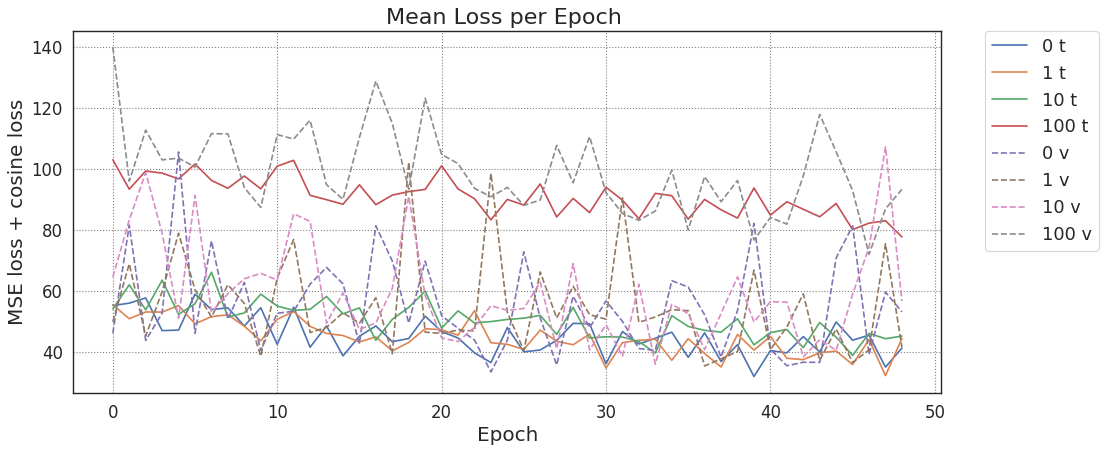

[0.43940247 0.44537484 0.4397859  0.45348996 0.45596088 0.44797382
 0.4496803  0.45583005 0.46137886 0.45396973 0.4706918  0.45507584
 0.47288704 0.46391497 0.48289373 0.47187726 0.47274639 0.47778018
 0.47126126 0.4684951  0.4737041  0.47449491 0.48367316 0.4979301
 0.46993745 0.48927906 0.48110366 0.48049545 0.48405898 0.47853382
 0.50562702 0.48097569 0.49011755 0.48135444 0.48620354 0.500329
 0.48447108 0.49488227 0.48888806 0.50996144 0.49475992 0.49895574
 0.48944103 0.49781274 0.48374838 0.49101864 0.48892138 0.51395555
 0.49952802]
[0.43835106 0.44557252 0.44484177 0.44117829 0.44357181 0.45510497
 0.45055611 0.45218369 0.45743339 0.46465072 0.46172789 0.45763526
 0.463161   0.46572132 0.47164469 0.47633988 0.47331221 0.48445052
 0.47254999 0.47048625 0.4727459  0.4799218  0.46105724 0.47784515
 0.4868     0.48585566 0.47644116 0.48752194 0.48180756 0.48261084
 0.49767275 0.48233009 0.49554194 0.47931535 0.50102522 0.48260588
 0.49299099 0.50385033 0.48369835 0.49316607 0.48865

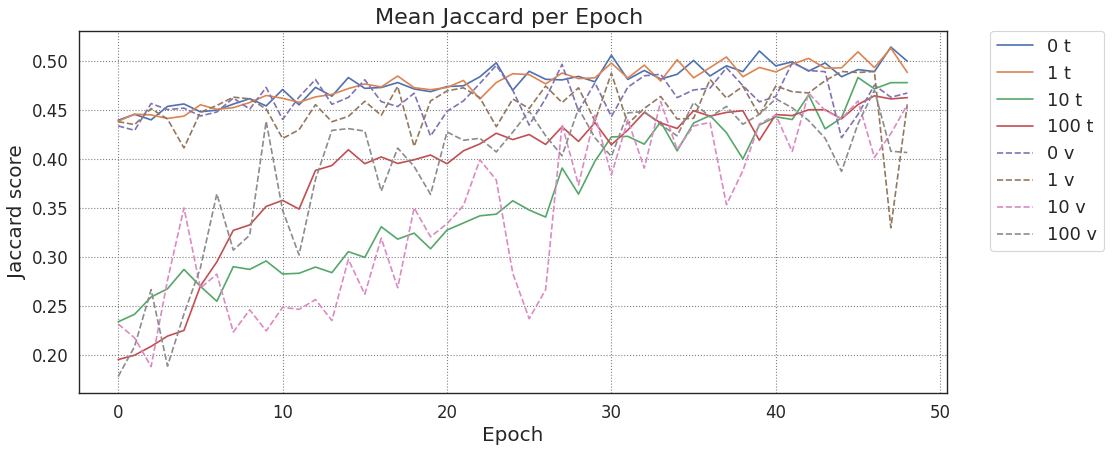

In [29]:
# sort out loss plots for training and validation here with 
# the new file format (will make it easier to transfer the 
# plots to the CT examples when we do this!)

# RANO output loss for both training and validation - over differing penalty types
print("Regression")
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Epochs = 49
sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})

input_names = ["cosine_absolute_values_c_0_e100_Continue",
               "cosine_absolute_values_c_1_e100_Continue",
               "cosine_absolute_values_c_10_e100_Continue",
               "cosine_absolute_values_c_100_e100_Continue"]

#                "cosine_absolute_values_c10_e100",
#                "cosine_absolute_values_c100_e100"]
# input_names = ["cosine_level_0_e100_all","cosine_level_1_e100_all","cosine_level_10_e100_all","cosine_level_100_e100_all"]

# input_names = ["cosine_level_none_2","cosine_level_0","cosine_level_100","cosine_level_one_nocuda_2","cosine_level_50","cosine_level_75_sub","cosine_level_100_all"]

# input_names = ["cosine_level_checker_cosine_0_RANO","cosine_level_checker_cosine_100_RANO"]

# input_names = ["cosine_level_checker_cosine_0_BBox","cosine_level_checker_cosine_0_RANO"]
# input_names = ["Prano_pretrain_1_C100"]
# input_names = ["brats_regress_100_c_10000_Prano_100_epochs"]
#
legend_names = ["0 t","1 t","10 t","100 t","0 v","1 v","10 v","100 v"]

output_type = ["training_loss","training_loss"]
output_axis = ["MSE loss + cosine loss"]
output_title = ["Loss"]
second_out = ["Training_loss","Validation_loss"]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):
    print(output_type[c])
    print(c)
    for s in range(len(input_names)):
        print(input_names[s])
        print(s)
        for i in range(Epochs):

            loss_0 = np.genfromtxt("Checkpoints_RANO/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i + 1)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        if c == 1:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0,linestyle='dashed')
        if c == 0:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()    

output_type = ["training_loss","training_loss"]
output_axis = ["Jaccard score"]
output_title = ["Jaccard"]
second_out = ["Training_Jaccard","Validation_Jaccard"]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):
    for s in range(len(input_names)):
        for i in range(Epochs):
            loss_0 = np.genfromtxt("Checkpoints_RANO/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i + 1)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        if c == 1:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0,linestyle='dashed')
        if c == 0:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()  

# for some reasont eh values of jaccard for 0 and 10000 are the same, not sure why this is the case but will redo some training to find out,
# also not saving the hyperparameters for rano so need to fix that

Regression
training_loss
0
cosine_absolute_values_c_0_e100_Continue
0
[55.14988755 55.92687444 57.62920331 46.92508413 47.1090185  58.85651266
 53.83744709 54.38689429 48.43844391 54.42734918 42.41774918 54.59878726
 41.48861372 48.47411469 38.65810086 45.07190104 48.46398878 43.28996532
 44.34305477 51.66540825 46.62159935 44.51820757 39.65131718 36.43928347
 47.91781031 39.96399961 40.573082   43.74561113 49.30739497 49.16837059
 36.05274243 46.62885478 42.54459202 44.43021601 46.4134736  38.16929917
 46.19599671 36.7949123  42.32768677 31.8764605  40.38415907 39.63994361
 44.96759614 39.94398978 49.76099676 43.7903527  45.43807275 34.97134833
 41.21977194]
cosine_absolute_values_c_1_e100_Continue
1
[55.39032891 50.82088505 53.04075079 53.00701061 55.14065847 49.16939791
 51.48967767 52.11519785 48.3717554  43.56176041 50.654481   53.16458663
 48.33025778 45.98713648 45.31820785 43.21380833 44.87562928 40.29557001
 43.04876878 47.54849732 47.21217954 45.42959428 53.44519298 42.972270

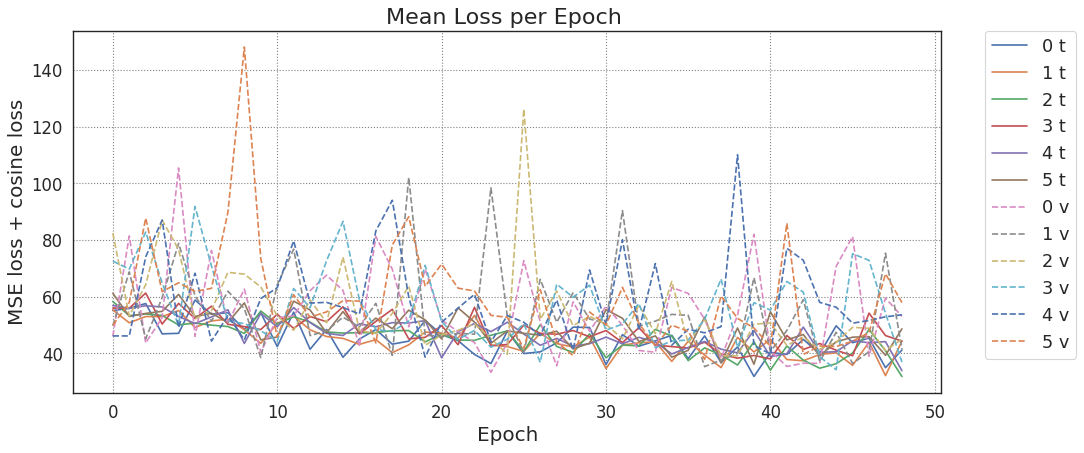

[0.43940247 0.44537484 0.4397859  0.45348996 0.45596088 0.44797382
 0.4496803  0.45583005 0.46137886 0.45396973 0.4706918  0.45507584
 0.47288704 0.46391497 0.48289373 0.47187726 0.47274639 0.47778018
 0.47126126 0.4684951  0.4737041  0.47449491 0.48367316 0.4979301
 0.46993745 0.48927906 0.48110366 0.48049545 0.48405898 0.47853382
 0.50562702 0.48097569 0.49011755 0.48135444 0.48620354 0.500329
 0.48447108 0.49488227 0.48888806 0.50996144 0.49475992 0.49895574
 0.48944103 0.49781274 0.48374838 0.49101864 0.48892138 0.51395555
 0.49952802]
[0.43835106 0.44557252 0.44484177 0.44117829 0.44357181 0.45510497
 0.45055611 0.45218369 0.45743339 0.46465072 0.46172789 0.45763526
 0.463161   0.46572132 0.47164469 0.47633988 0.47331221 0.48445052
 0.47254999 0.47048625 0.4727459  0.4799218  0.46105724 0.47784515
 0.4868     0.48585566 0.47644116 0.48752194 0.48180756 0.48261084
 0.49767275 0.48233009 0.49554194 0.47931535 0.50102522 0.48260588
 0.49299099 0.50385033 0.48369835 0.49316607 0.48865

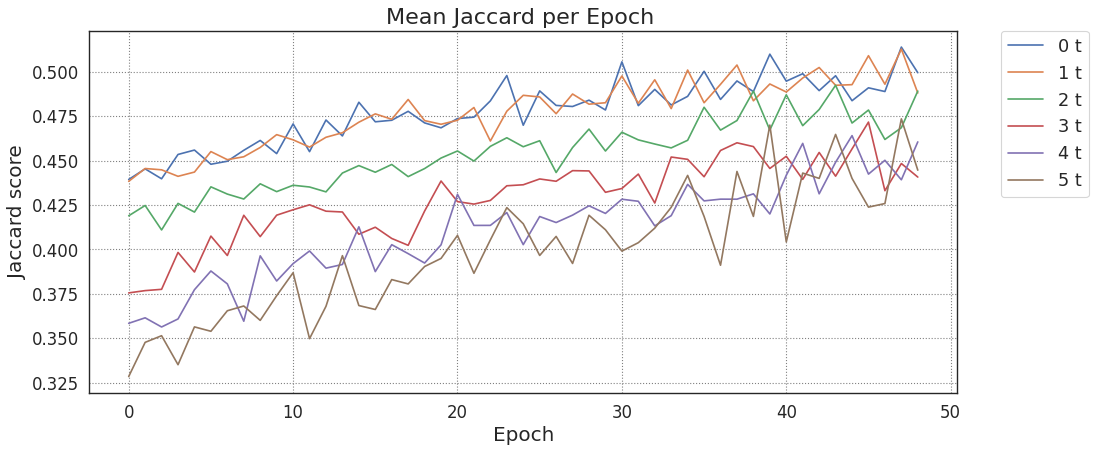

[0.43357158 0.4290508  0.45640877 0.45021764 0.45174008 0.44370809
 0.44778609 0.4619881  0.45069826 0.47281273 0.44019853 0.46297575
 0.48092421 0.45561002 0.4626107  0.48063361 0.45837824 0.45331943
 0.46692692 0.42332845 0.44841672 0.45910057 0.47686355 0.49537453
 0.46994701 0.43443165 0.46148818 0.49637246 0.44867091 0.47762209
 0.44315463 0.47308163 0.48468264 0.48620087 0.46241539 0.47026899
 0.47210796 0.49279002 0.47465984 0.45812197 0.46352683 0.49802867
 0.49001886 0.48889651 0.42158314 0.44526134 0.47521733 0.46282141
 0.46709182]
[0.43793764 0.43494111 0.45123101 0.44055843 0.41115414 0.44747191
 0.45443157 0.46290732 0.46119215 0.45089731 0.42073076 0.42969882
 0.45526494 0.4378488  0.44327674 0.45871934 0.4443366  0.47391055
 0.41268049 0.45905898 0.46923538 0.47245742 0.46237594 0.43282222
 0.46102817 0.45141258 0.47428035 0.4573735  0.47243279 0.4386055
 0.48733513 0.43582778 0.45143929 0.46358451 0.44061665 0.44130278
 0.48094712 0.46193714 0.47394979 0.44435525 0.474

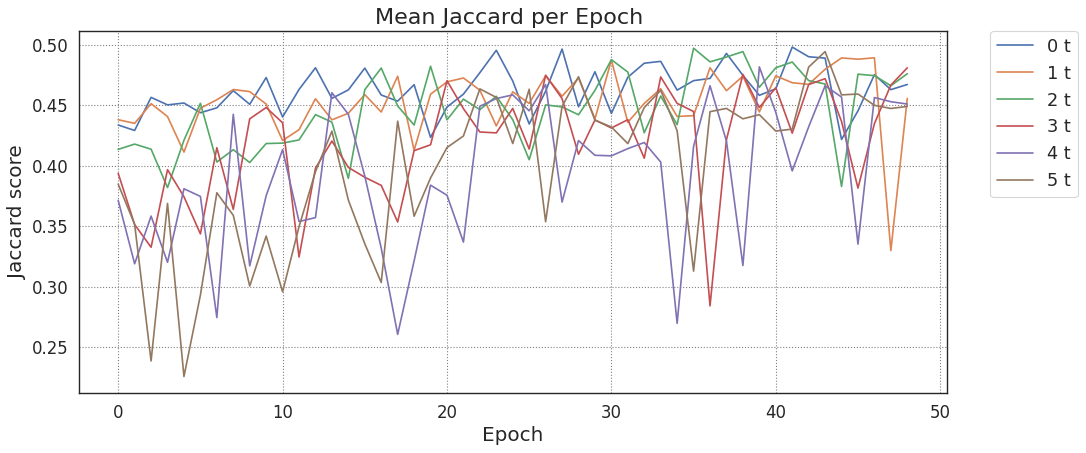

In [7]:
# sort out loss plots for training and validation here with 
# the new file format (will make it easier to transfer the 
# plots to the CT examples when we do this!)

# RANO output loss for both training and validation - over differing penalty types
print("Regression")
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Epochs = 49
sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})

input_names = ["cosine_absolute_values_c_0_e100_Continue",
               "cosine_absolute_values_c_1_e100_Continue",
               "cosine_absolute_values_c_2_e100_Continue",
               "cosine_absolute_values_c_3_e100_Continue",
               "cosine_absolute_values_c_4_e100_Continue",
               "cosine_absolute_values_c_5_e100_Continue"]

#                "cosine_absolute_values_c10_e100",
#                "cosine_absolute_values_c100_e100"]
# input_names = ["cosine_level_0_e100_all","cosine_level_1_e100_all","cosine_level_10_e100_all","cosine_level_100_e100_all"]

# input_names = ["cosine_level_none_2","cosine_level_0","cosine_level_100","cosine_level_one_nocuda_2","cosine_level_50","cosine_level_75_sub","cosine_level_100_all"]

# input_names = ["cosine_level_checker_cosine_0_RANO","cosine_level_checker_cosine_100_RANO"]

# input_names = ["cosine_level_checker_cosine_0_BBox","cosine_level_checker_cosine_0_RANO"]
# input_names = ["Prano_pretrain_1_C100"]
# input_names = ["brats_regress_100_c_10000_Prano_100_epochs"]
#
legend_names = ["0 t","1 t","2 t","3 t","4 t","5 t","0 v","1 v","2 v","3 v","4 v","5 v"]

output_type = ["training_loss","training_loss"]
output_axis = ["MSE loss + cosine loss"]
output_title = ["Loss"]
second_out = ["Training_loss","Validation_loss"]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):
    print(output_type[c])
    print(c)
    for s in range(len(input_names)):
        print(input_names[s])
        print(s)
        for i in range(Epochs):

            loss_0 = np.genfromtxt("Checkpoints_RANO/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i + 1)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        if c == 1:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0,linestyle='dashed')
        if c == 0:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()    

output_type = ["training_loss"]#,"training_loss"]
output_axis = ["Jaccard score"]
output_title = ["Jaccard"]
second_out = ["Training_Jaccard","Validation_Jaccard"]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):
    for s in range(len(input_names)):
        for i in range(Epochs):
            loss_0 = np.genfromtxt("Checkpoints_RANO/Checkpoints/"+ input_names[s]+ "/" + second_out[0] + "/epoch_"+str(i + 1)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        if c == 1:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0,linestyle='dashed')
        if c == 0:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()  

figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):
    for s in range(len(input_names)):
        for i in range(Epochs):
            loss_0 = np.genfromtxt("Checkpoints_RANO/Checkpoints/"+ input_names[s]+ "/" + second_out[1] + "/epoch_"+str(i + 1)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        if c == 1:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0,linestyle='dashed')
        if c == 0:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()  

# for some reasont eh values of jaccard for 0 and 10000 are the same, not sure why this is the case but will redo some training to find out,
# also not saving the hyperparameters for rano so need to fix that

Regression
training_loss
0
cosine_absolute_values_c0_e100
0
[674.72034875 536.05586575 438.11169938 370.3176113  310.82966182
 264.67698278 234.22948857 202.47222043 183.68376107 166.28690245
 155.79127172 136.29440953 134.1215023  127.82173113 108.87225099
 112.09238203 104.95271952  96.54316472  97.67401785  91.19665688
  87.61362955  83.73075786  76.87175722  82.091884    74.53145945
  79.86104827  67.11974646  74.04480597  74.3761277   71.17054619
  60.93693017  67.1958539   65.51128089  59.9729555   58.17268078
  65.48575535  63.6413989   61.63519671  54.53851467  58.07952591
  60.30976146  54.63525466  51.56878156  57.05278063  53.53214723
  57.7313319   52.1378629   51.00908518  45.48521958  55.14988755
  55.92687444  57.62920331  46.92508413  47.1090185   58.85651266
  53.83744709  54.38689429  48.43844391  54.42734918  42.41774918
  54.59878726  41.48861372  48.47411469  38.65810086  45.07190104
  48.46398878  43.28996532  44.34305477  51.66540825  46.62159935
  44.51820757  3

OSError: Checkpoints_RANO/Checkpoints/cosine_absolute_values_c_10_e100_Continue/Training_loss/epoch_1training_loss.csv not found.

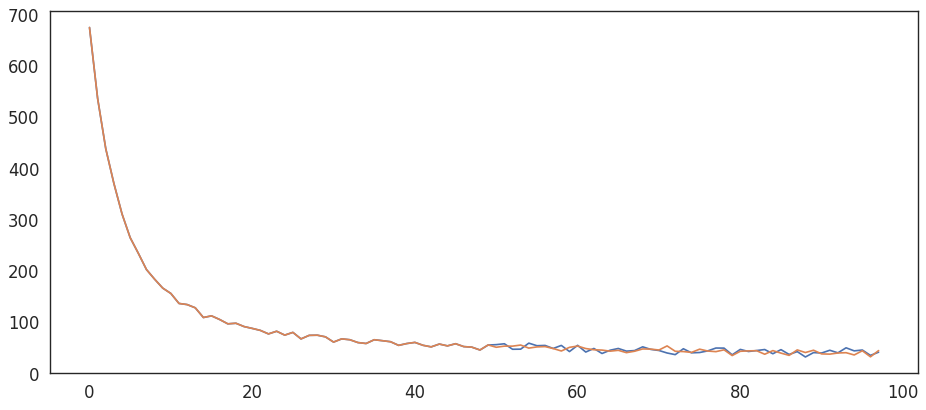

In [1]:
# sort out loss plots for training and validation here with 
# the new file format (will make it easier to transfer the 
# plots to the CT examples when we do this!)

# RANO output loss for both training and validation - over differing penalty types
print("Regression")
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Epochs = 49
sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})

input_names1 = ["cosine_absolute_values_c0_e100",
               "cosine_absolute_values_c0_e100",
              "cosine_absolute_values_c0_e100",
               "cosine_absolute_values_c0_e100"]

input_names2 = ["cosine_absolute_values_c_0_e100_Continue",
               "cosine_absolute_values_c_1_e100_Continue",
              "cosine_absolute_values_c_10_e100_Continue",
               "cosine_absolute_values_c_100_e100_Continue"]

legend_names = ["0 t","1 t","10 t","100 t","0 v","1 v","10 v","100 v"]

output_type = ["training_loss","training_loss"]
output_axis = ["MSE loss + cosine loss"]
output_title = ["Loss"]
second_out = ["Training_loss","Validation_loss"]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):
    print(output_type[c])
    print(c)
    for s in range(len(input_names1)):
        print(input_names1[s])
        print(s)
        
        for i in range(Epochs):
            
            loss_0 = np.genfromtxt("Checkpoints_RANO/Checkpoints/"+ input_names1[s]+ "/" + second_out[c] + "/epoch_"+str(i + 1)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]
                
        for i in range(Epochs):
            
            loss_0 = np.genfromtxt("Checkpoints_RANO/Checkpoints/"+ input_names2[s]+ "/" + second_out[c] + "/epoch_"+str(i + 1)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        if c == 1:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0,linestyle='dashed')
        if c == 0:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()    

output_type = ["training_loss","training_loss"]
output_axis = ["Jaccard score"]
output_title = ["Jaccard"]
second_out = ["Training_Jaccard","Validation_Jaccard"]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):
    for s in range(len(input_names1)):
        for i in range(Epochs):
            loss_0 = np.genfromtxt("Checkpoints_RANO/Checkpoints/"+ input_names1[s]+ "/" + second_out[c] + "/epoch_"+str(i + 1)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]
        for i in range(Epochs):
            loss_0 = np.genfromtxt("Checkpoints_RANO/Checkpoints/"+ input_names2[s]+ "/" + second_out[c] + "/epoch_"+str(i + 1)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        if c == 1:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0,linestyle='dashed')
        if c == 0:
            print(loss_Nan_0)
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()  

# for some reasont eh values of jaccard for 0 and 10000 are the same, not sure why this is the case but will redo some training to find out,
# also not saving the hyperparameters for rano so need to fix that